# Exploring Data Visualization Techniques in Python

Data visualization is a powerful tool for understanding and communicating data. It transforms raw data into visual formats, allowing patterns, trends, and insights to be more easily recognized. Below, we will delve into various visualization techniques, and provide examples using different Python libraries. This Jupyter notebook is a tutorial on creating beautiful and effective data visualizations using popular Python libraries like Matplotlib, Seaborn, and Plotly. We will explore different types of plots, customization techniques, and how to make your visualizations both informative and aesthetically pleasing.

Matplotlib and Seaborn are both powerful for data visualization in Python, but they have distinct strengths:

• **Matplotlib:** A versatile, low-level library that can create nearly any type of plot with extensive control over every detail. Its powerful customization capabilities make it ideal for producing a wide range of complex visualizations, though this flexibility often comes with increased complexity, verbosity, and time investment.

• **Seaborn:** Built on Matplotlib, Seaborn is more user-friendly and excels in creating statistical plots with a modern, polished look. It simplifies common visualizations through concise code, attractive defaults, and built-in themes, making it ideal for generating quick, professional-looking plots. Hence, Seaborn strikes a balance between ease of use and customization, offering just enough flexibility to tweak key elements without overwhelming options.

In essence, use Matplotlib for detailed, custom visualizations, and Seaborn for effortless, stylish statistical plots.

In [126]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1. Basic Plotting with Matplotlib

## 1.1. Line Plot

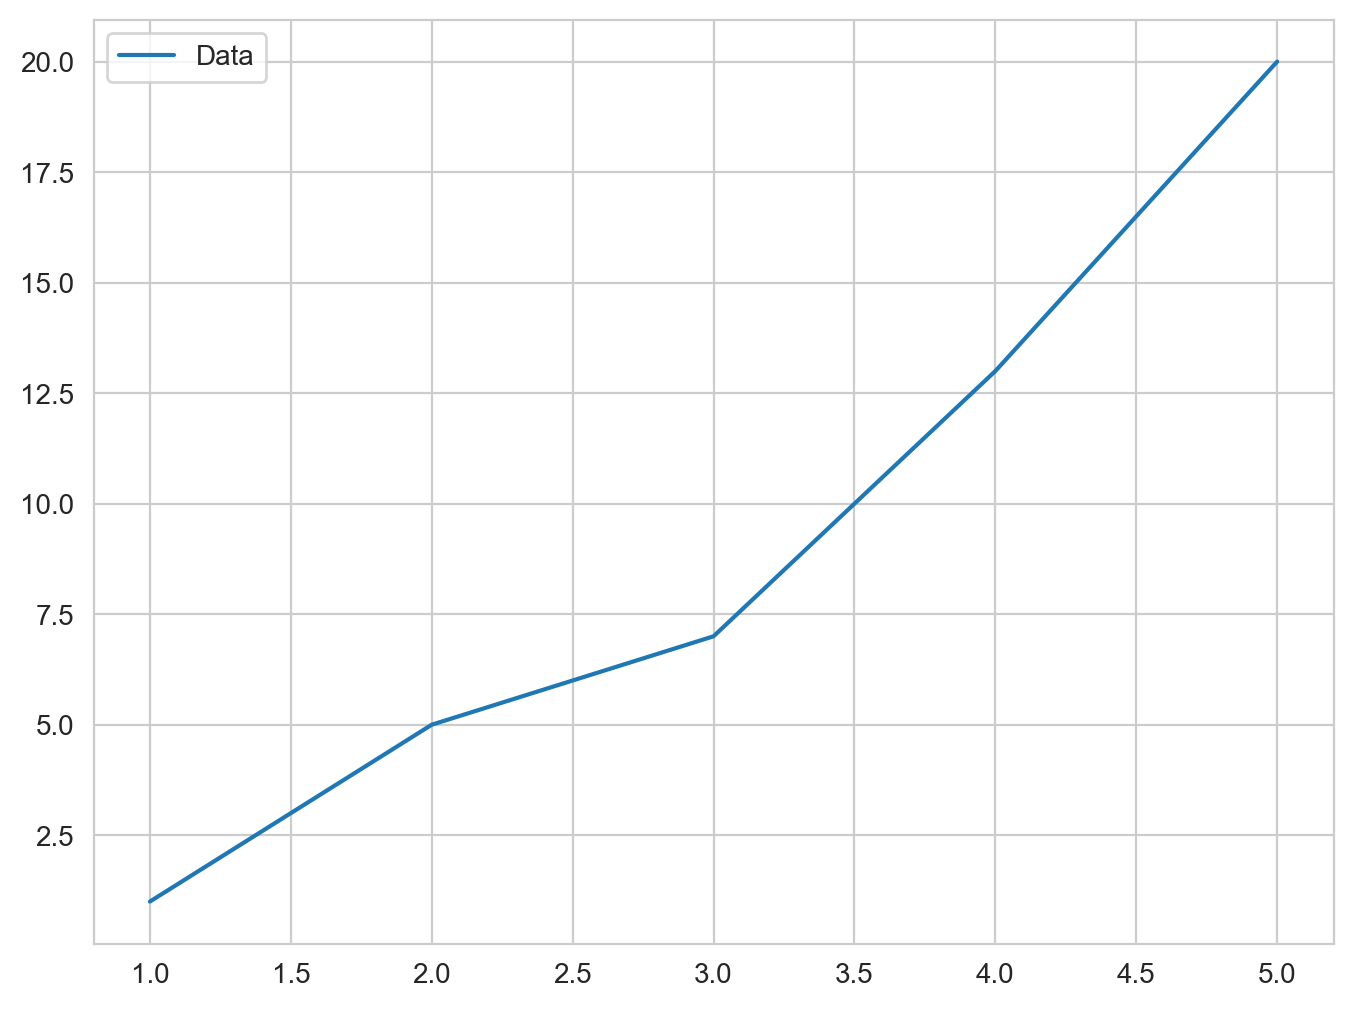

In [127]:
# Example: Simple line plot
fig = plt.figure(figsize=(8, 6), dpi=200) # create a figure (width = 8", height = 6"), increase dpi for higher resolution

x = [1, 2, 3, 4, 5]                       # initialize x data
y = [1, 5, 7, 13, 20]                     # initialize y data

plt.plot(x, y, label='Data')              # plot the data points with a line connecting them
plt.legend()                              # add a legend to identify the data series
plt.grid(True)                            # enable grid lines to enhance readability
plt.show()                                # display the plot

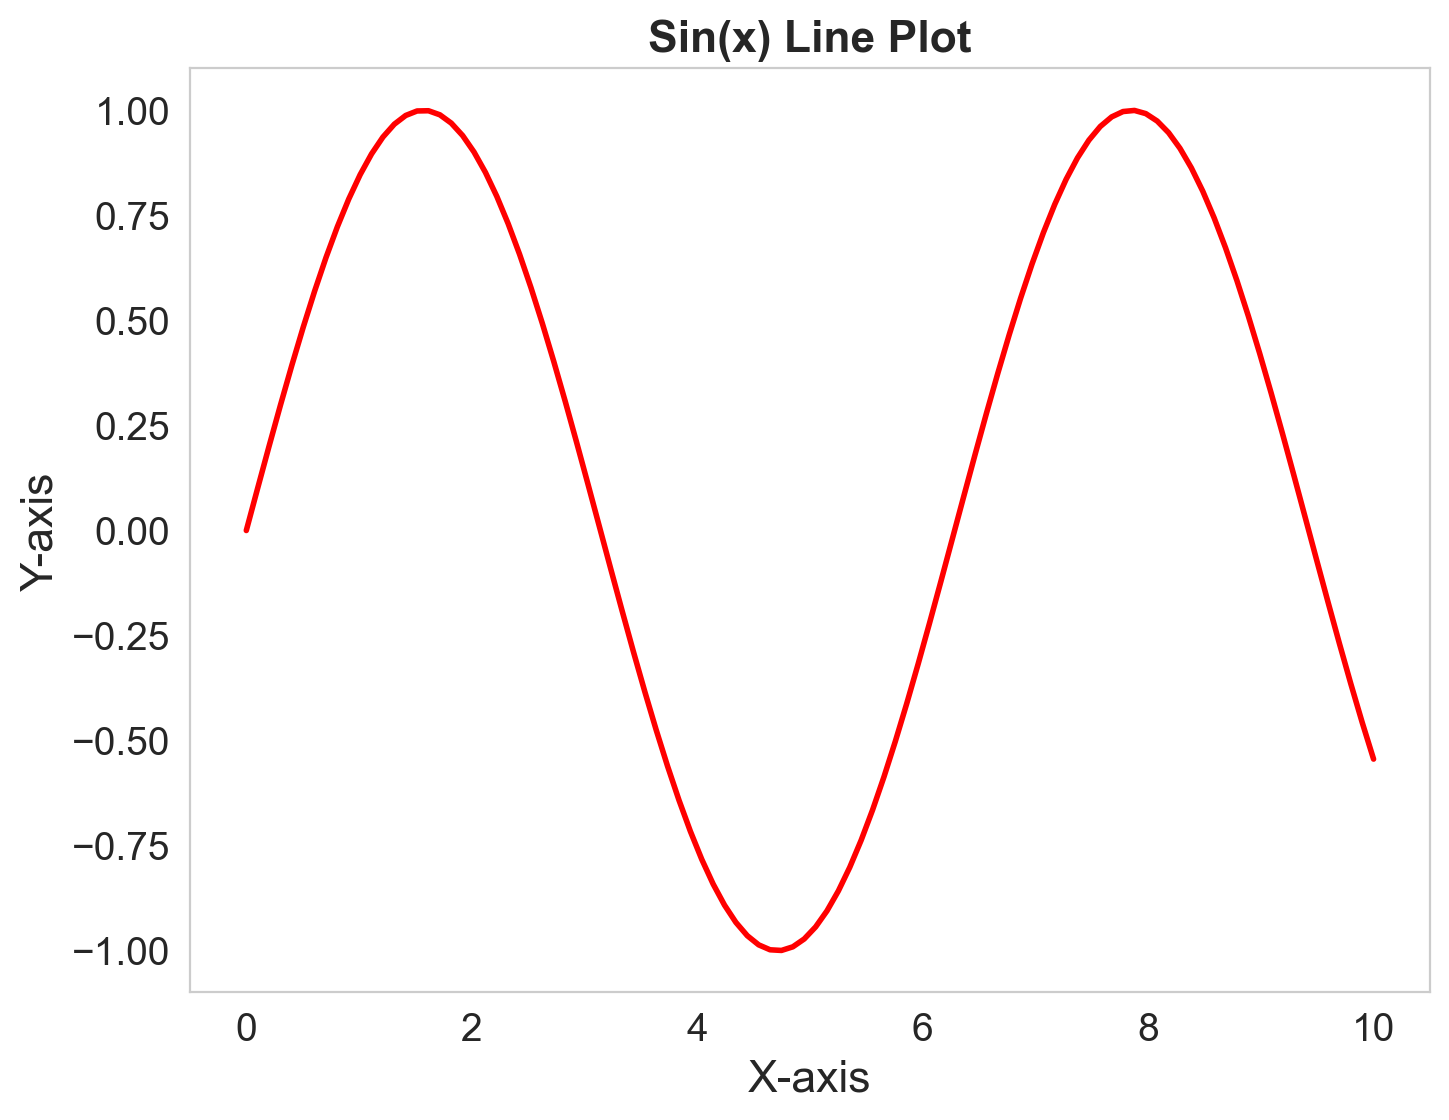

In [133]:
# Example: Sin(x) line plot 
x = np.linspace(0, 10, 100)    # x is a sequence of 100 evenly spaced values from 0 to 10
y = np.sin(x)                  # y is the sine of each x value

plt.figure(figsize=(8, 6), dpi=200)
plt.plot(x, y, label='Sine Wave', color='red', linewidth=2)    # plot the sine wave
plt.title('Sin(x) Line Plot', fontsize=16, weight='bold')      # add title
plt.xlabel('X-axis', fontsize=16)                              # label the x and y axes
plt.ylabel('Y-axis', fontsize=16)
plt.xticks(fontsize=14)                                        # set the font size of the x and y axis tick labels
plt.yticks(fontsize=14)
plt.grid(False)
plt.show()

## 1.2. Scatter Plot

Use this as reference for different color options: https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py

Use this as reference for a variety of marker options: https://matplotlib.org/stable/api/markers_api.html

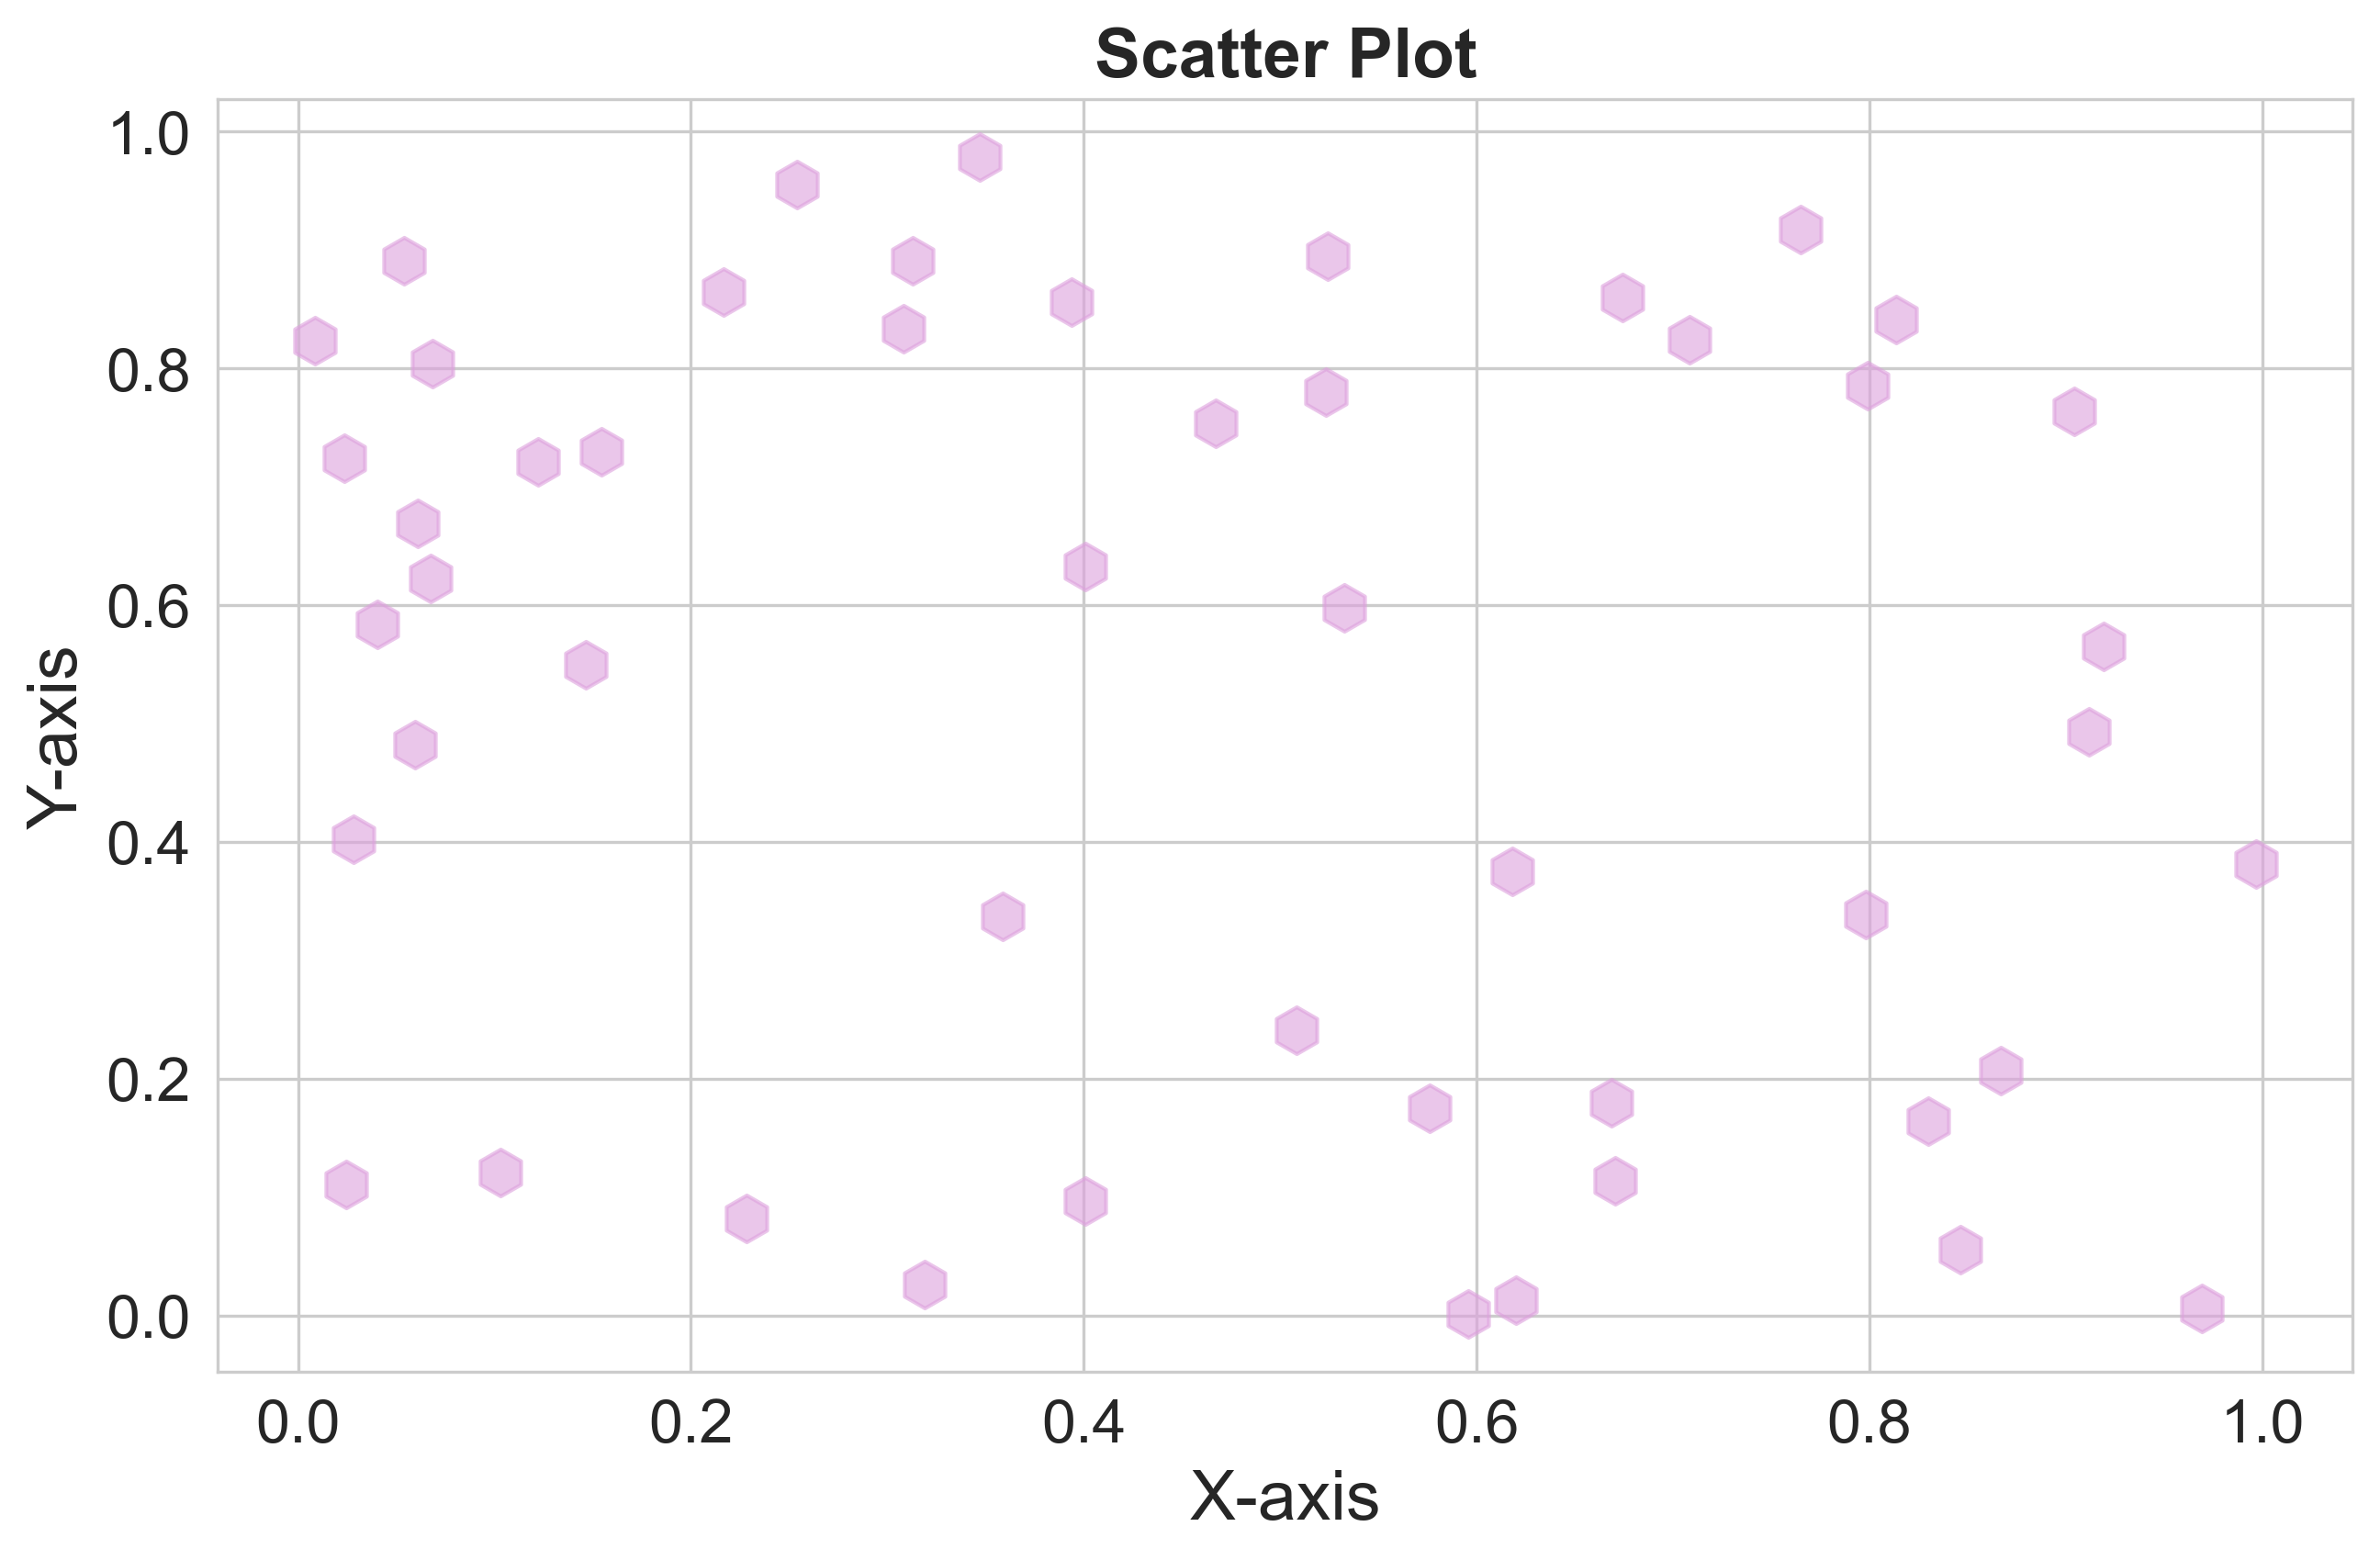

In [141]:
x = np.random.rand(50)     # generate 50 random points uniformly distributed between 0 and 1
y = np.random.rand(50)

plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(x, y, 
            marker='h',    # marker shape (hexagon, )
            s=150,         # marker size
            color='plum',  # marker color
            alpha=0.6)     # marker transparency (%)
plt.title('Scatter Plot', fontsize=18, weight='bold')
plt.xlabel('X-axis', fontsize=18)
plt.ylabel('Y-axis', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

## 1.3. Bar Plot

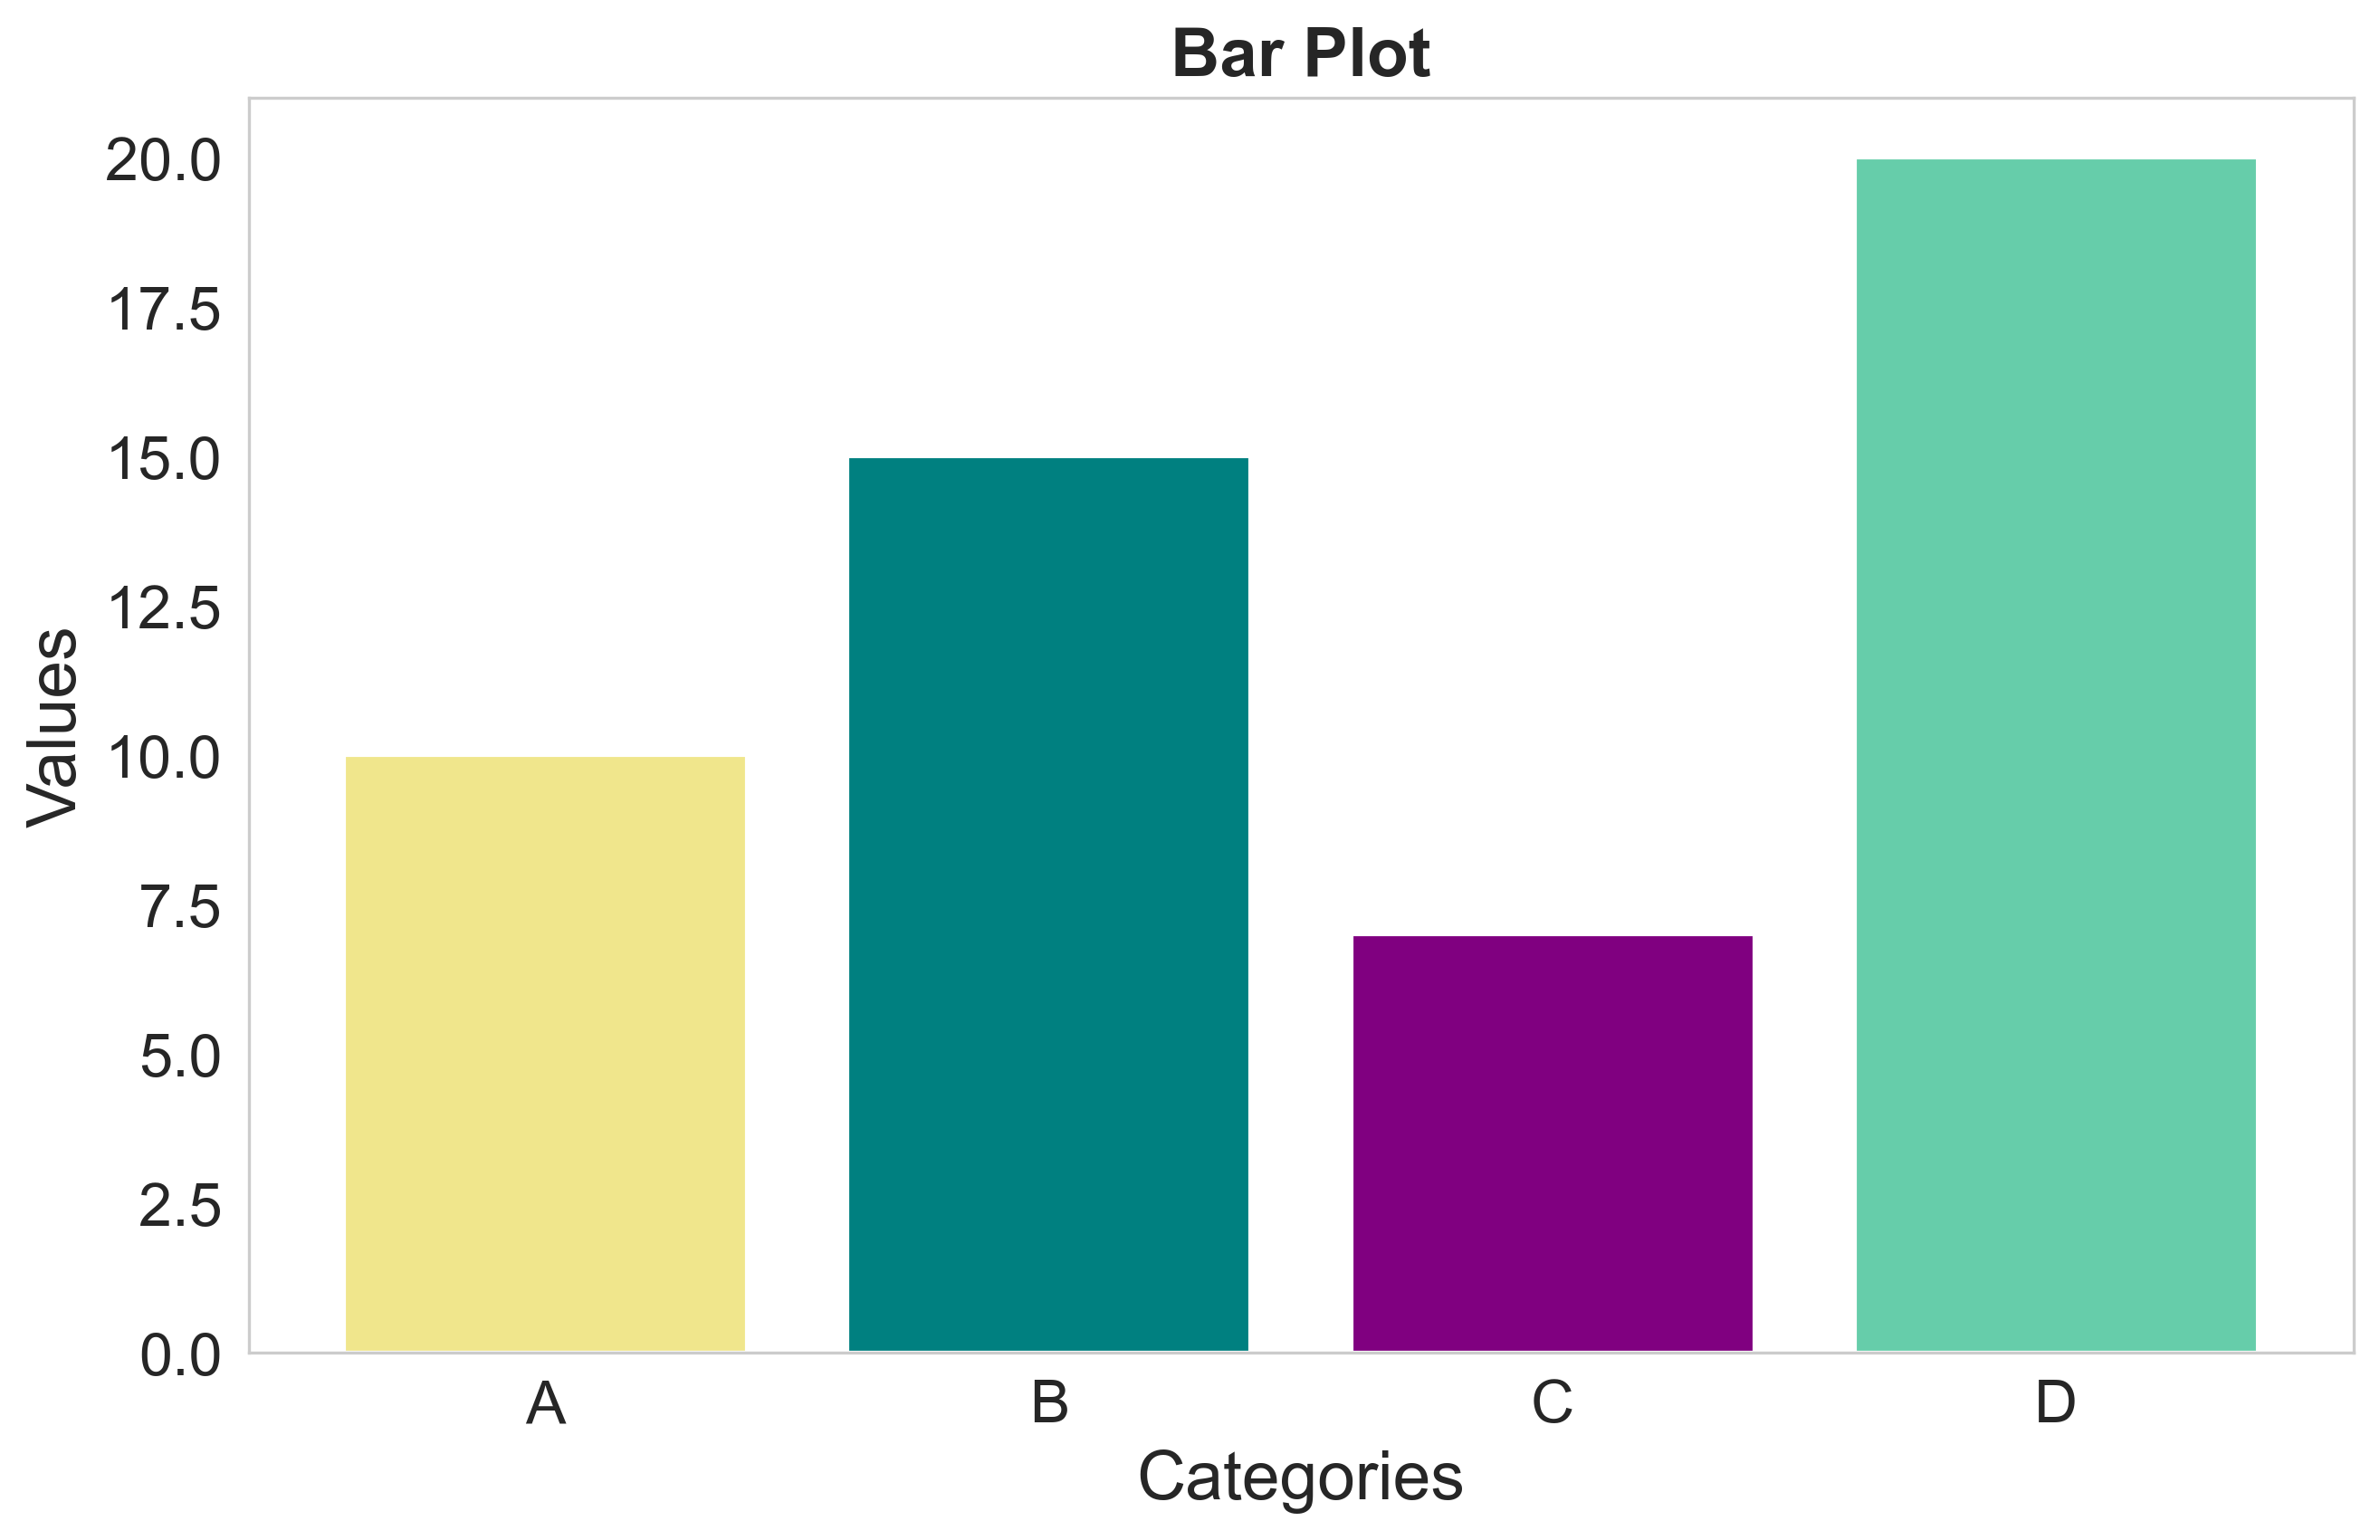

In [143]:
categories = ['A', 'B', 'C', 'D']
values = [10, 15, 7, 20]
colors = ['khaki', 'teal', 'purple', 'mediumaquamarine']  # colors assigned to each bar

plt.figure(figsize=(10, 6), dpi=300)
plt.bar(categories, values, color=colors)
plt.title('Bar Plot', fontsize=18, weight='bold')
plt.xlabel('Categories', fontsize=18)
plt.ylabel('Values', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(False)
plt.show()

## 1.4. Pie Chart

Pie charts are statistical graphics that illustrate numerical proportions. Each slice represents a category's relative contribution to the whole, effective for displaying simple comparisons among a few categories.

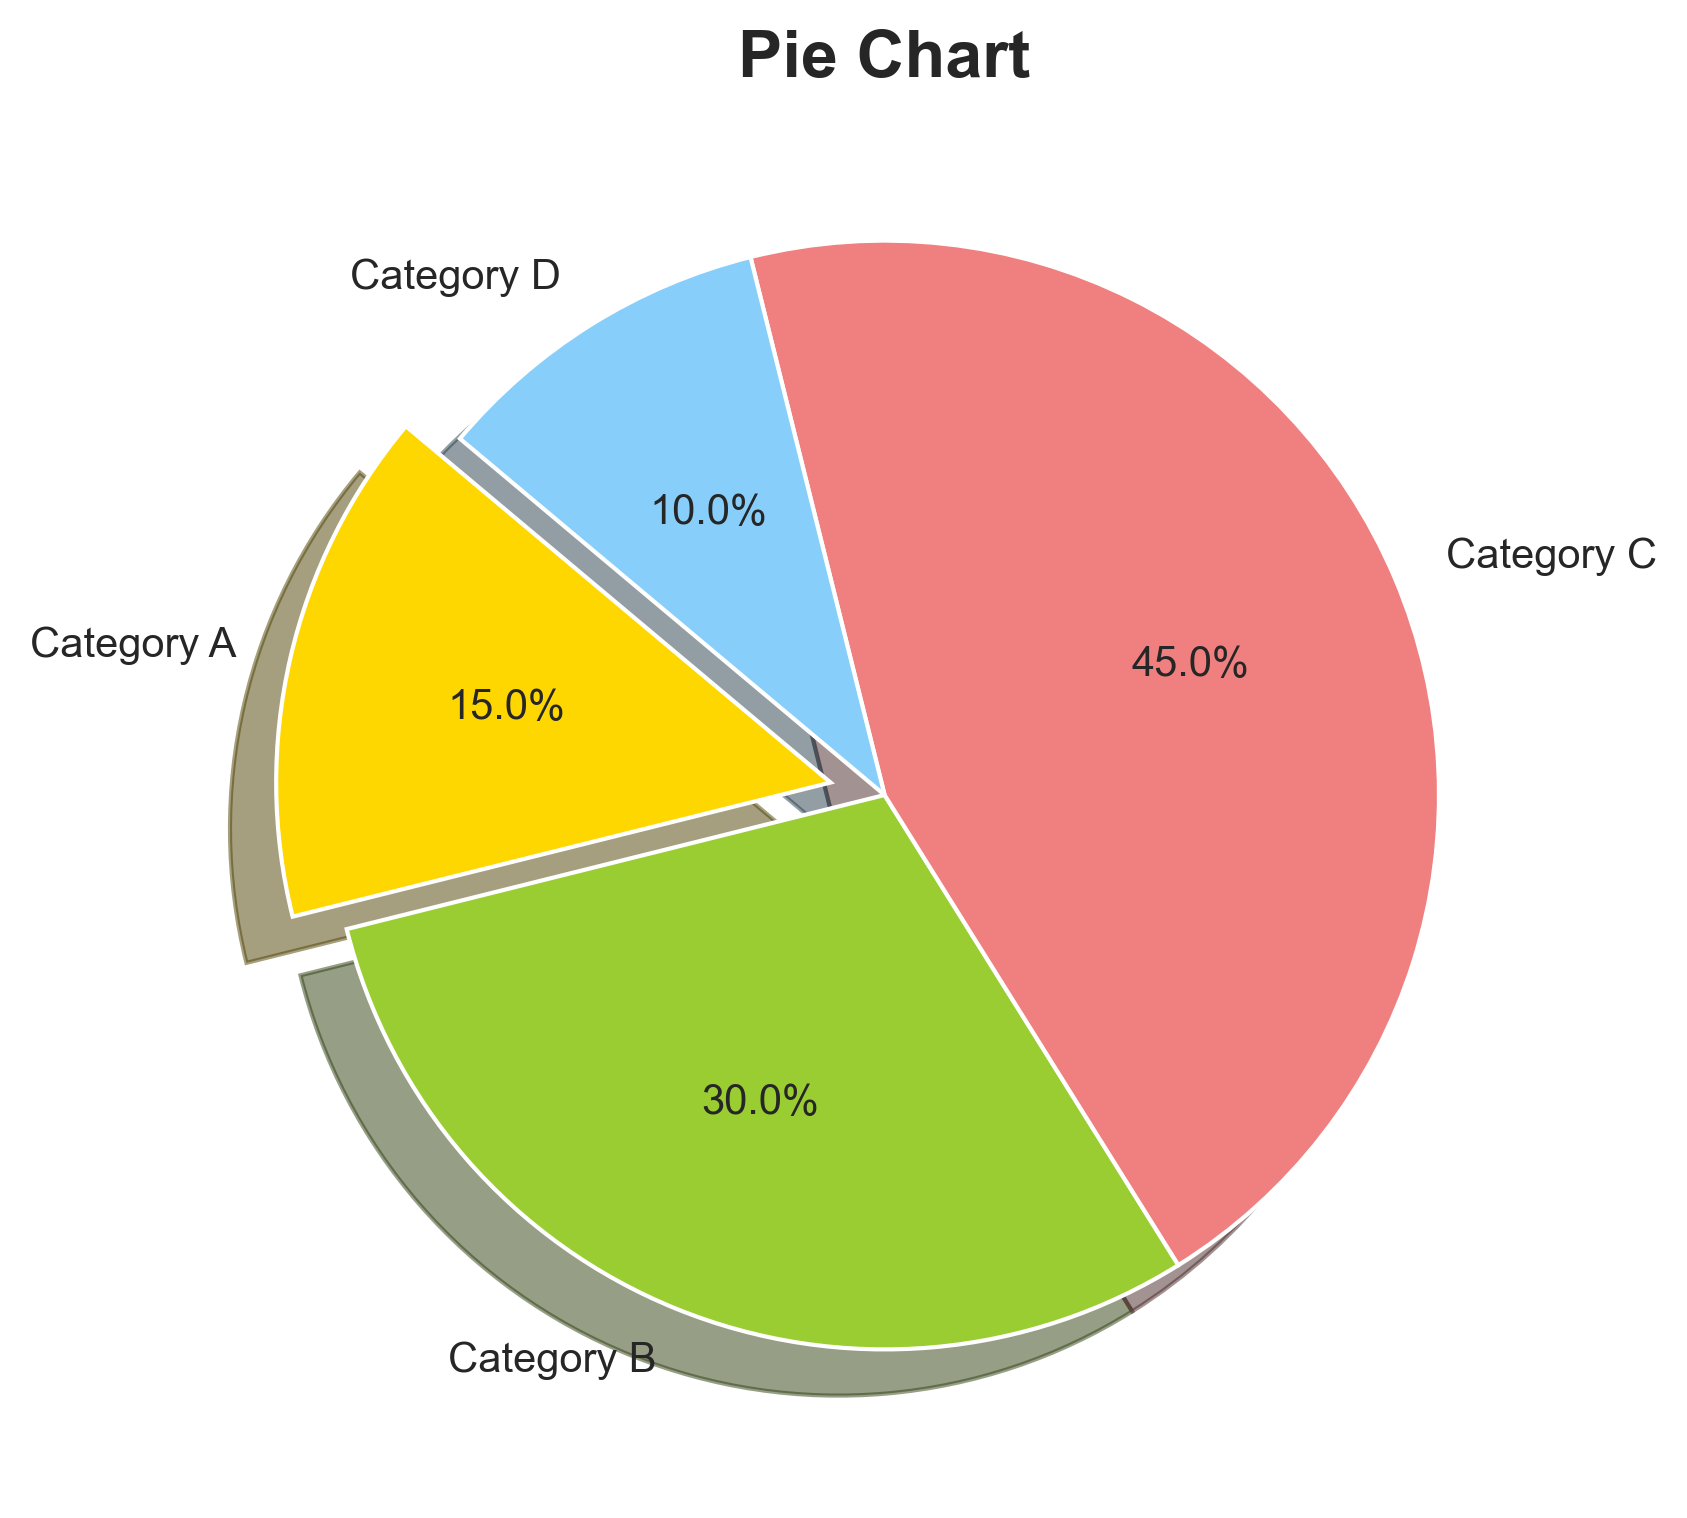

In [146]:
labels = ['Category A', 'Category B', 'Category C', 'Category D']  # slice labels
sizes = [15, 30, 45, 10]                                           # corresponding sizes for each slice
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']     # colors assigned to each pie slice
explode = (0.1, 0, 0, 0)                                           # offset the first slice to make it stand out

plt.figure(figsize=(10, 6), dpi=300)
plt.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%',   # show percentage of each slice
    shadow=True,         # add shadow for a 3D effect
    startangle=140       # rotate the start angle for better layout
)
plt.title('Pie Chart', fontsize=16, weight='bold')
plt.show()

Now, let's have some fun with pie charts. Pun intended! You can decide to add (or not to add?) pineapple as a topping as well.

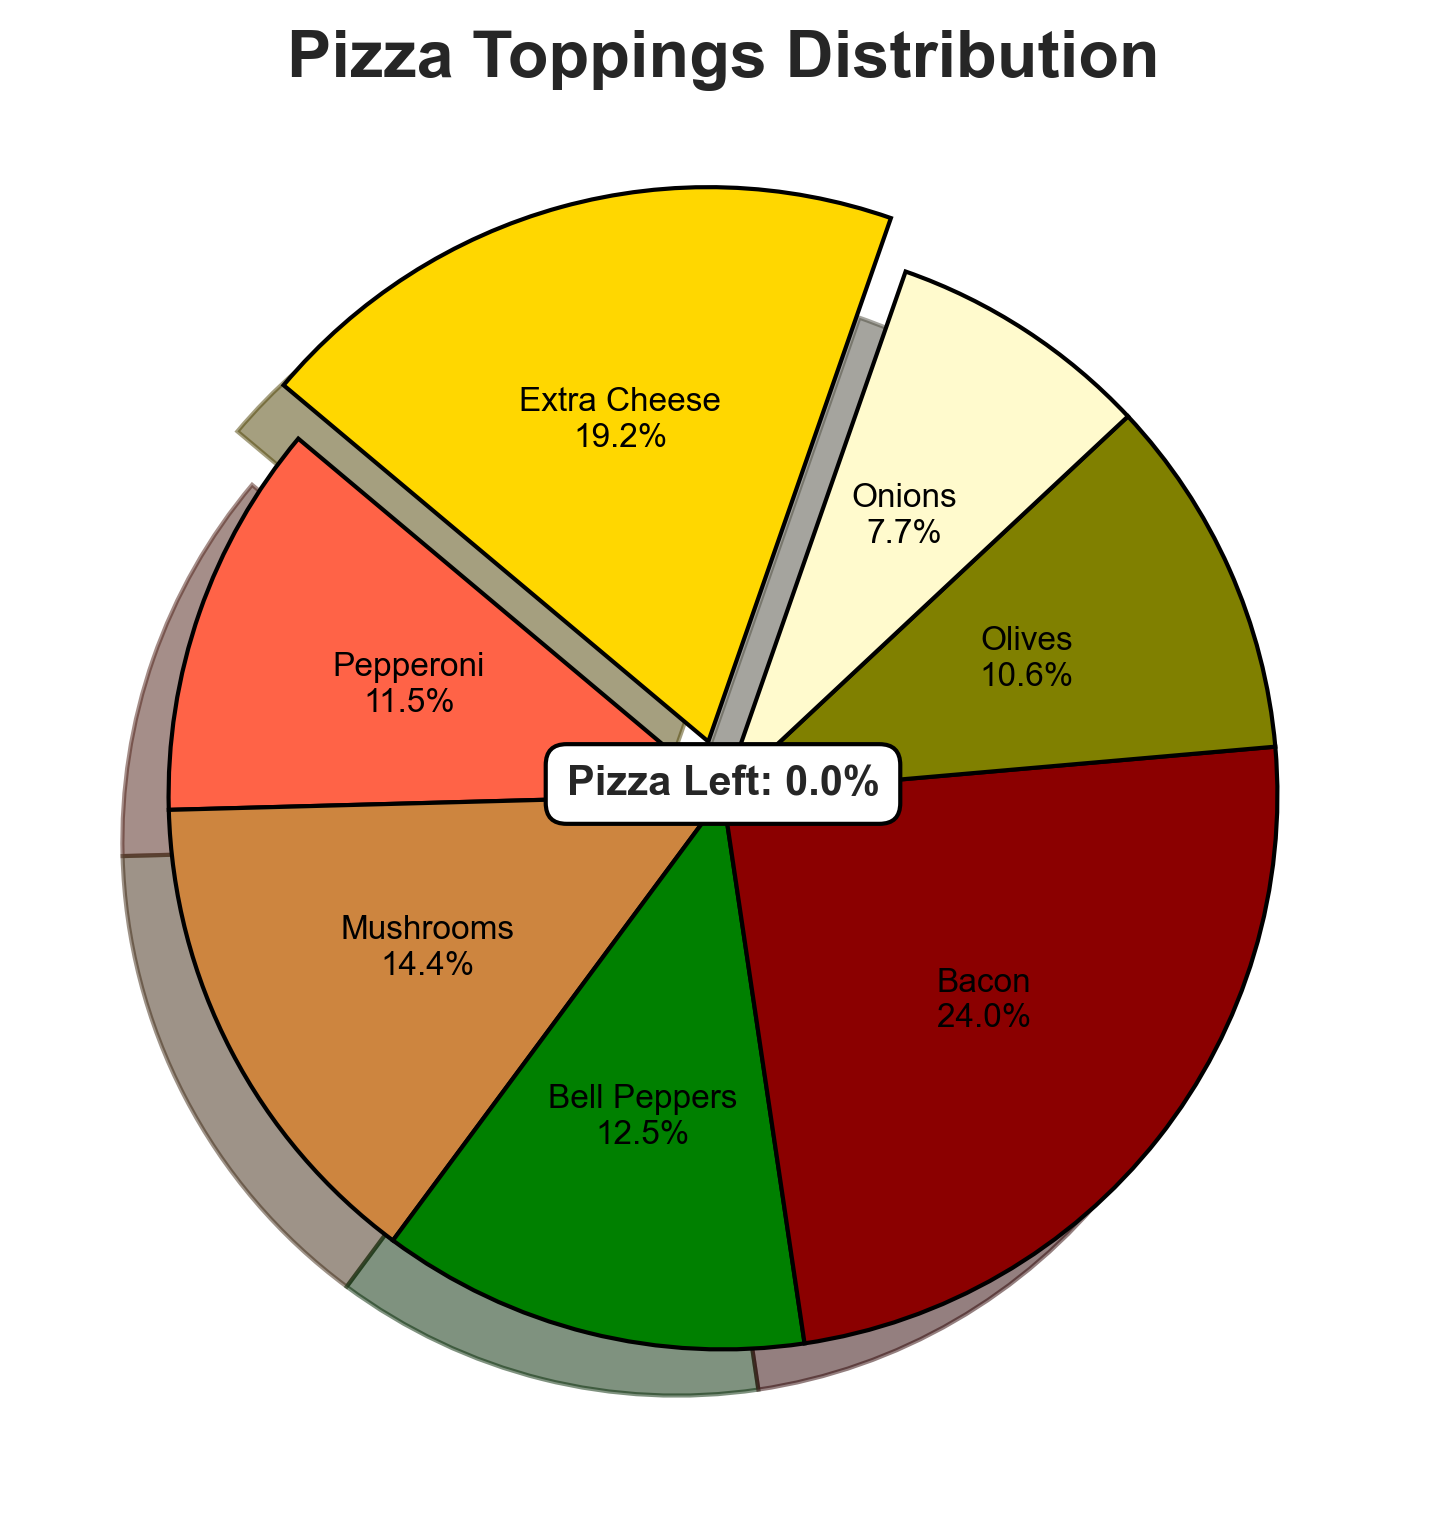

In [201]:
labels = ['Pepperoni', 'Mushrooms', 'Bell Peppers', 'Bacon', 'Olives', 'Onions', 'Extra Cheese']
sizes = [12, 15, 13, 25, 11, 8, 20]                                                   # sizes of each topping
colors = ['#FF6347', 'peru', 'green', 'darkred', 'olive', 'lemonchiffon', '#FFD700']  # colors for each topping
explode = (0, 0, 0, 0, 0, 0, 0.1)                                                     # highlight 'Extra Cheese'

plt.figure(figsize=(10, 6), dpi=300)

def format_label(pct, all_values):                            # function to format labels with percentage and name
    total = sum(all_values)
    absolute = int(round(pct / 100. * total))
    label = labels[all_values.index(absolute)]
    return f'{label}\n{pct:.1f}%'

plt.pie(
    sizes, 
    explode=explode, 
    colors=colors, 
    autopct=lambda pct: format_label(pct, sizes),             # show percentage and label on each slice
    shadow=True,                                              # add shadow for a 3D effect
    startangle=140,                                           # rotate the start angle for a better layout
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},        # black edge for slice separation
    textprops={'fontsize': 8, 'color': 'black'}              # style text labels
)

remaining_percentage = 100 - sum(sizes) / sum(sizes) * 100    # calculate the remaining percentage of pizza

plt.text(
    0, 0, f'Pizza Left: {remaining_percentage:.1f}%',         # add a centered annotation
    ha='center',
    fontsize=10,
    weight='bold',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

plt.title('Pizza Toppings Distribution', fontsize=16, weight="bold")
plt.show()

## 1.5. Hexbin Plot

Hexbin plots are used to visualize the density of points of a scatter plot in a 2D space. They are particularly useful for showing the relationship between two continuous variables when you have a large number of data points that overlap. Each bin represents the count of data points within that hexagon. The color intensity in each hexagon represents the number of data points it contains.

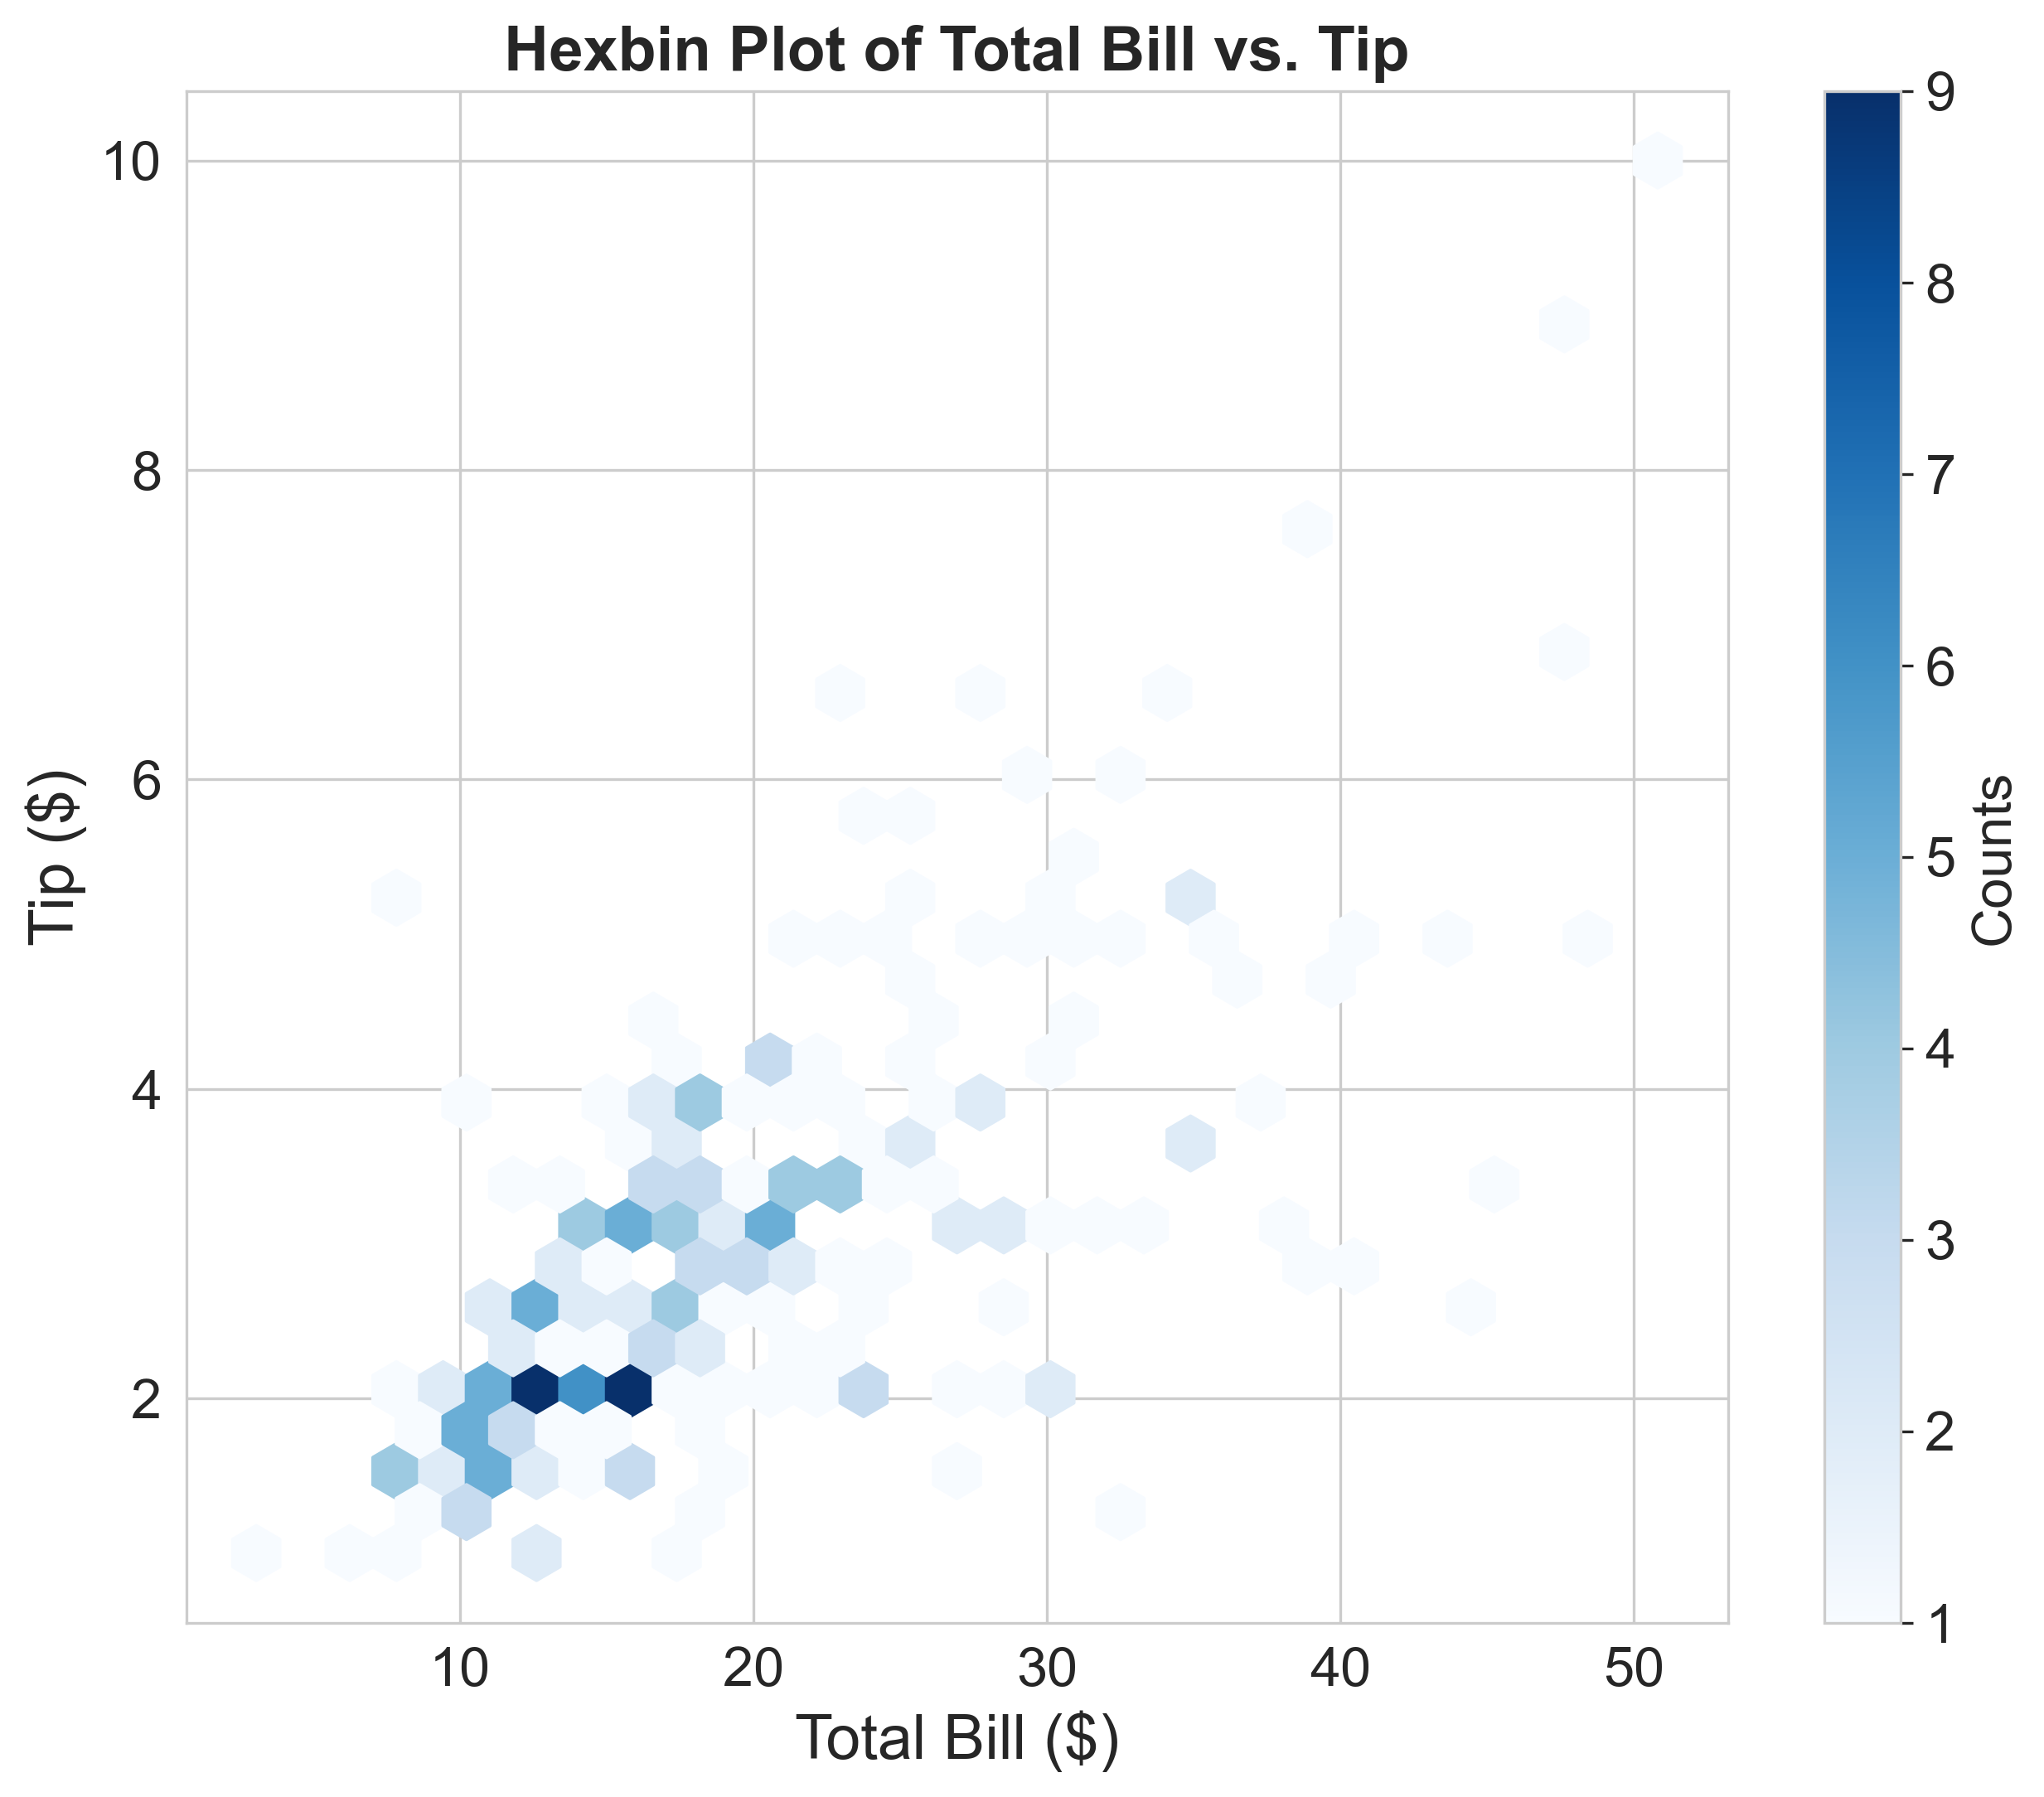

In [211]:
df = sns.load_dataset('tips')                        # load dataset

plt.figure(figsize=(10, 8), dpi=300)
plt.hexbin(df['total_bill'], df['tip'], gridsize=30, cmap='Blues', mincnt=1)
cb = plt.colorbar(label='Counts')                    # add a colorbar with label
cb.ax.tick_params(labelsize=16)                      # set colorbar tick labels size
cb.ax.yaxis.label.set_size(16)                       # set colorbar label size
plt.title('Hexbin Plot of Total Bill vs. Tip', fontsize=18, weight='bold')
plt.xlabel('Total Bill ($)', fontsize=18)
plt.ylabel('Tip ($)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## 1.6. Radial Bar Chart

Radial bar charts visualize data in a circular format, where bars extend outward from a central point. They combine elements of traditional bar charts with a circular layout to represent data in a visually appealing way, which is useful for comparing categories that make up parts of a whole.

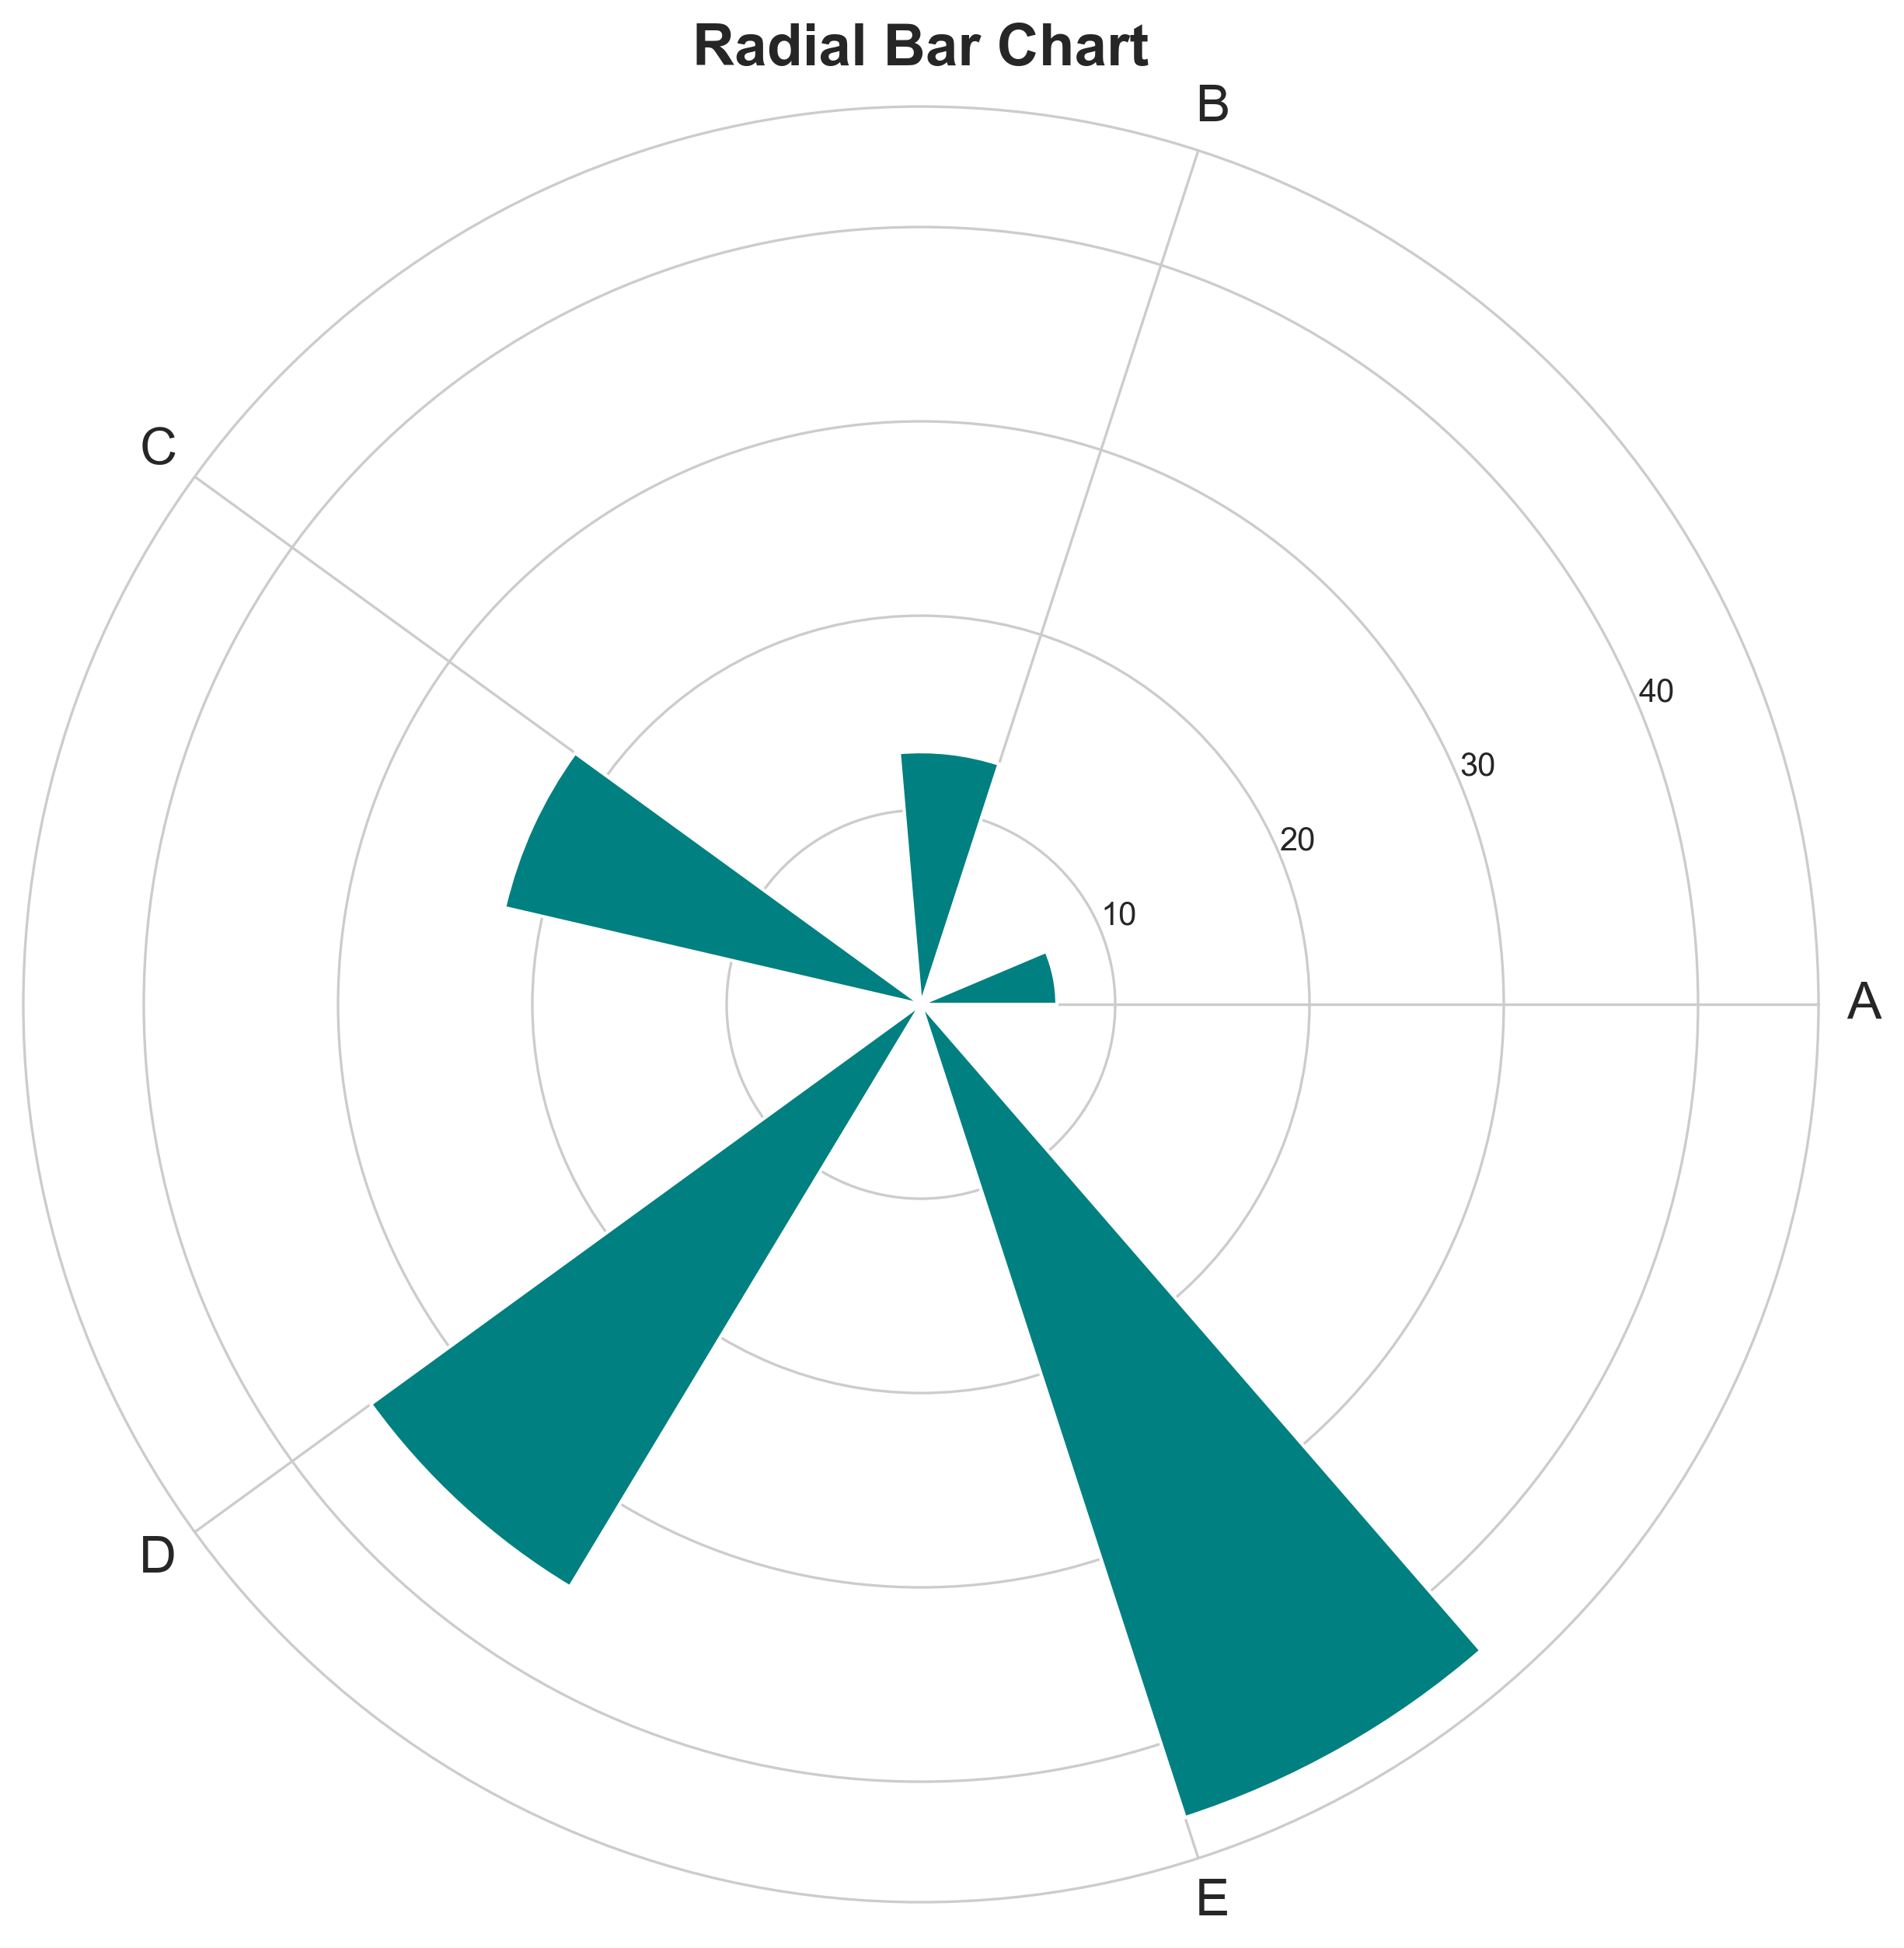

In [235]:
values = [7, 13, 22, 35, 44]
categories = ['A', 'B', 'C', 'D', 'E']

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True), dpi=300)
ax.bar(np.linspace(0, 2 * np.pi, len(values), endpoint=False), values, width=0.4, color='teal', align='edge')
ax.set_xticks(np.linspace(0, 2 * np.pi, len(categories), endpoint=False))
ax.set_xticklabels(categories, fontsize=16)
plt.title('Radial Bar Chart', fontsize=18, weight='bold')
plt.show()

# **2. Advanced Data Visualization with Seaborn**

Seaborn is a powerful library that builds on Matplotlib to provide a higher-level interface for statistical graphics.

## 2.1. Histogram with KDE

Histograms show the distribution of a dataset, and KDE (Kernel Density Estimate) provides a smoothed curve to visualize the distribution.

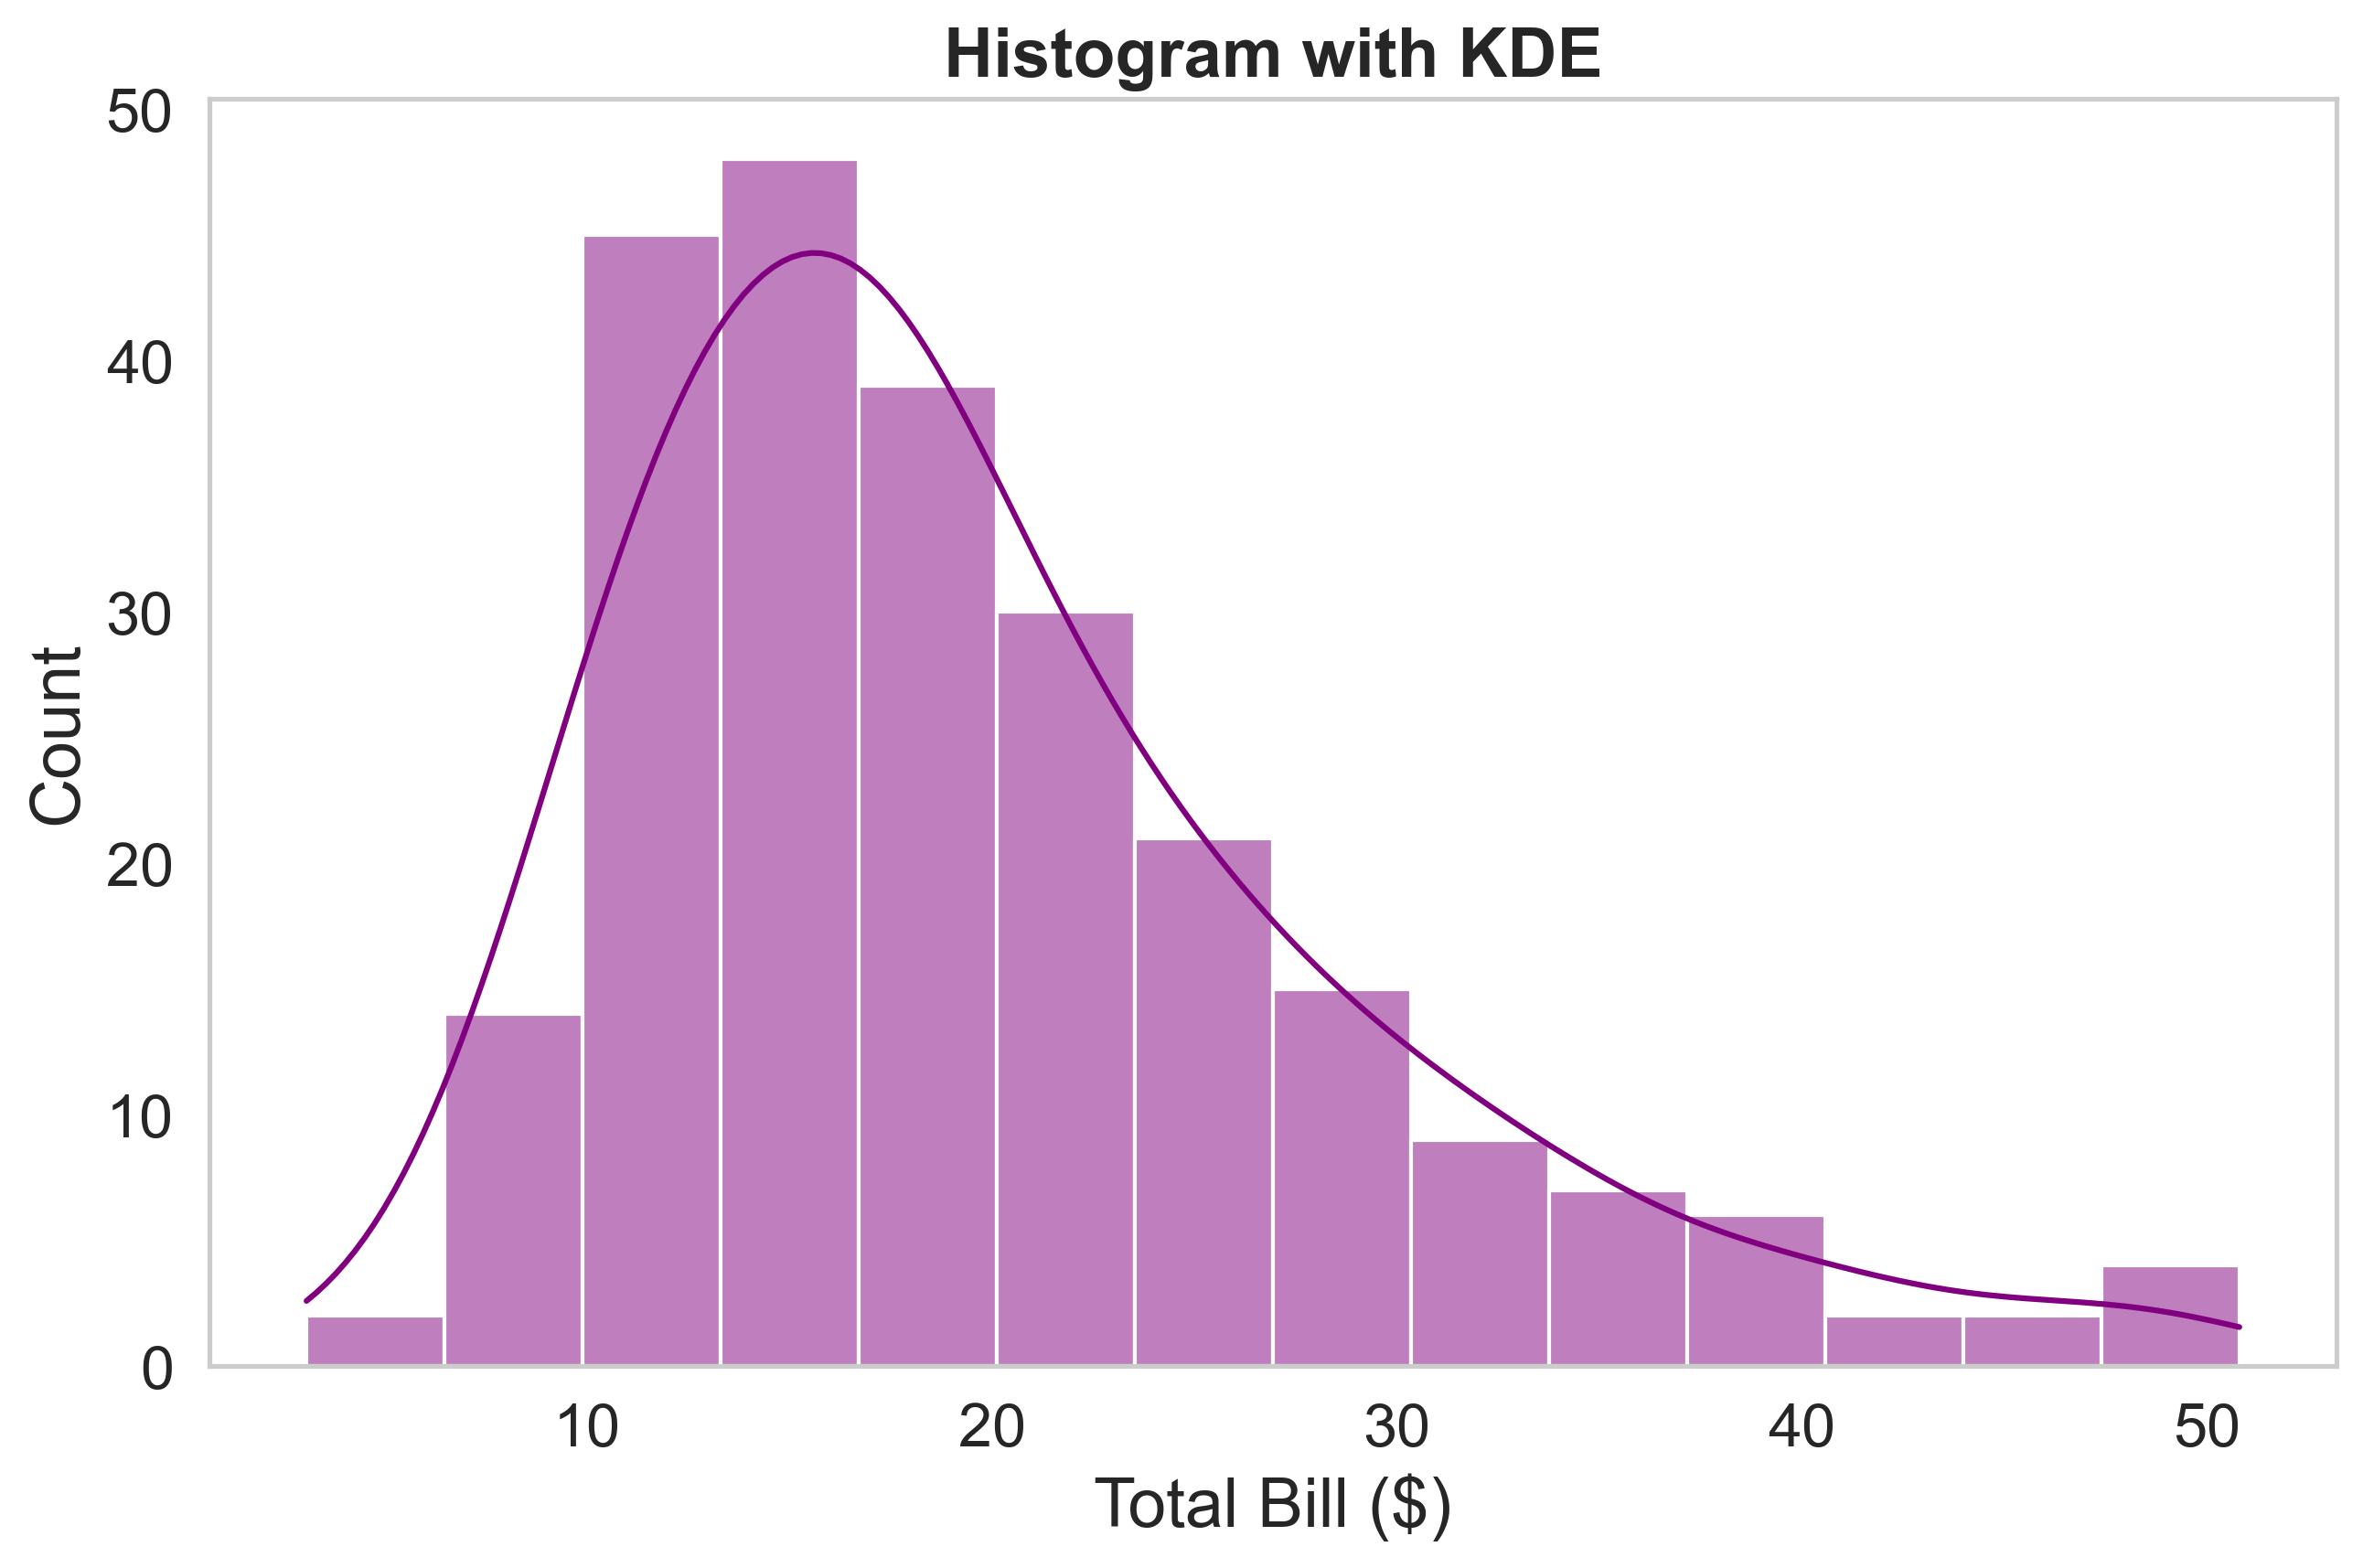

In [239]:
sns.set_theme(style='whitegrid')                            # apply a Seaborn theme to all plots
plt.figure(figsize=(10, 6), dpi=300)
sns.histplot(df['total_bill'], kde=True, color='purple')    # add a Kernel Density Estimate line to the histogram
plt.title('Histogram with KDE', fontsize=18, weight='bold')
plt.xlabel('Total Bill ($)', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(False)
plt.show()

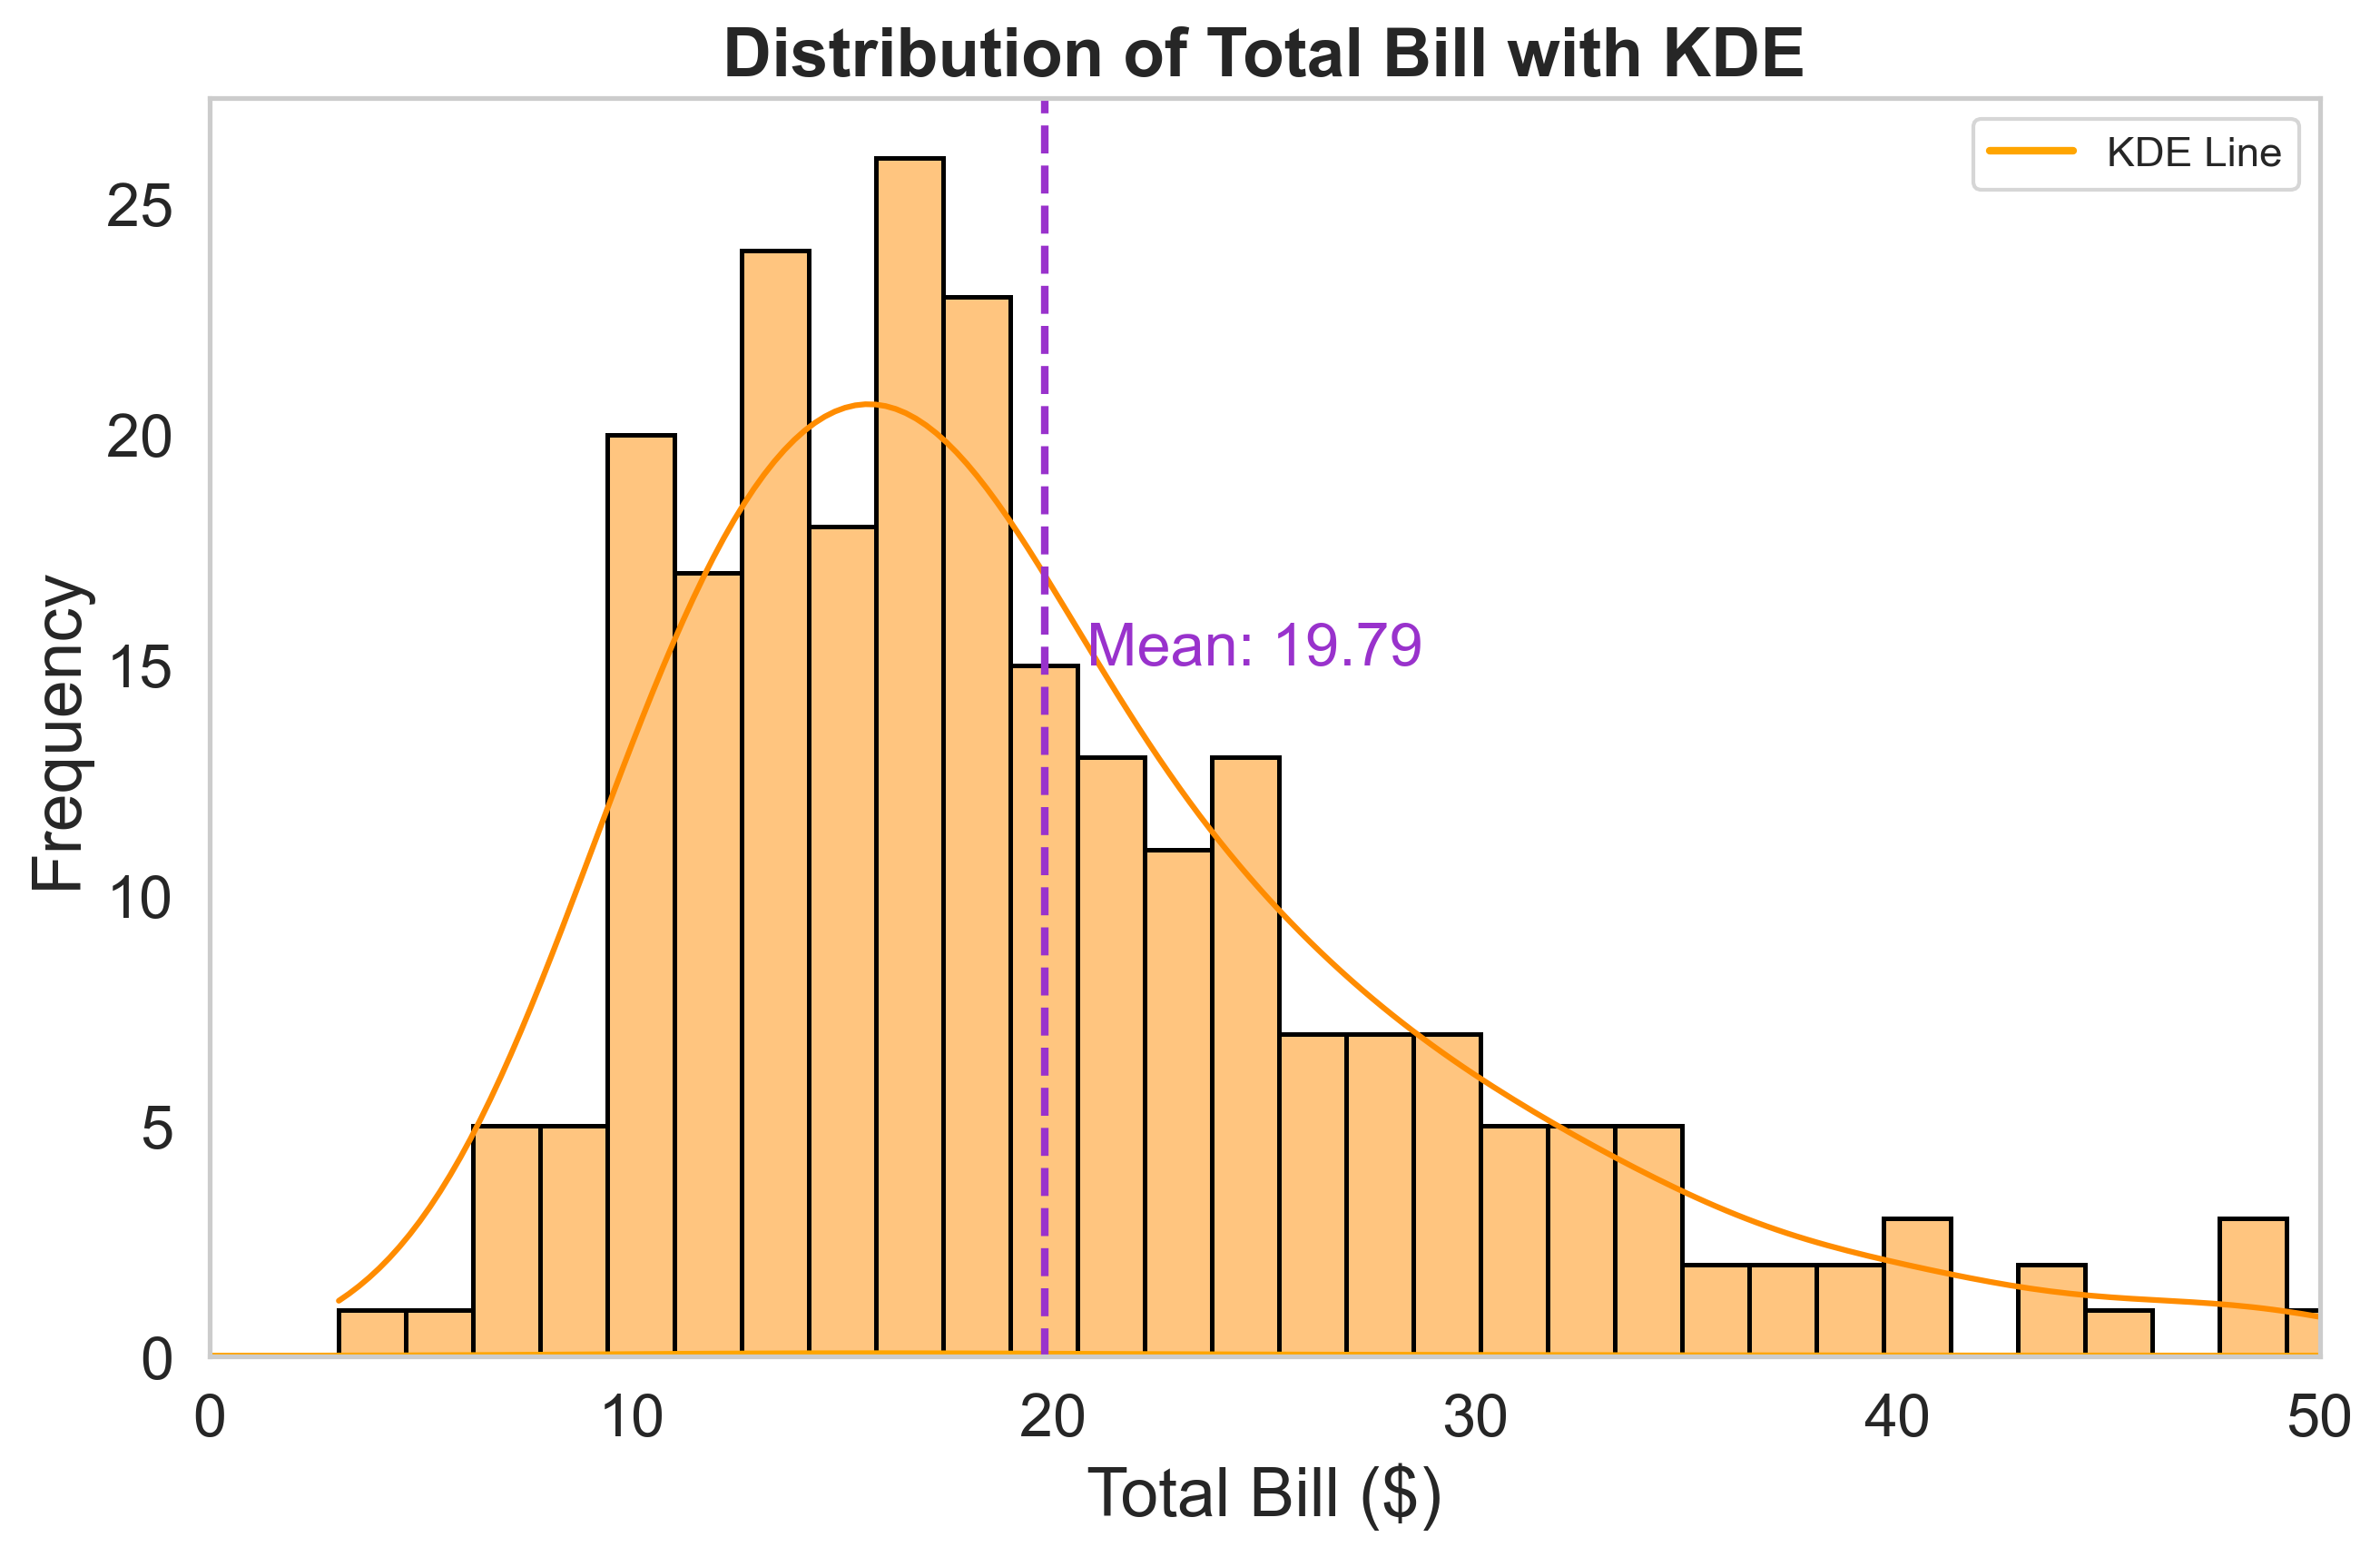

In [243]:
df = sns.load_dataset('tips')

sns.set_style("whitegrid")    # set a Seaborn style
plt.figure(figsize=(10, 6), dpi=300)
sns.histplot(df['total_bill'], kde=True, color='darkorange', bins=30, 
             edgecolor='black', linewidth=1.2)

sns.kdeplot(df['total_bill'], color='orange', lw=2, label='KDE Line')    # customize the KDE line
mean_value = df['total_bill'].mean()                                     # add a vertical line for the mean
plt.axvline(mean_value, color='darkorchid', linestyle='--', linewidth=2)
plt.text(mean_value + 1, 15, f'Mean: {mean_value:.2f}', color='darkorchid', fontsize=16)
plt.title('Distribution of Total Bill with KDE', fontsize=18, weight='bold')
plt.xlabel('Total Bill ($)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0,50)
plt.legend()
plt.grid(False)
plt.show()

## 2.2. Box Plot

Box plots are useful for visualizing the distribution of data and identifying outliers.

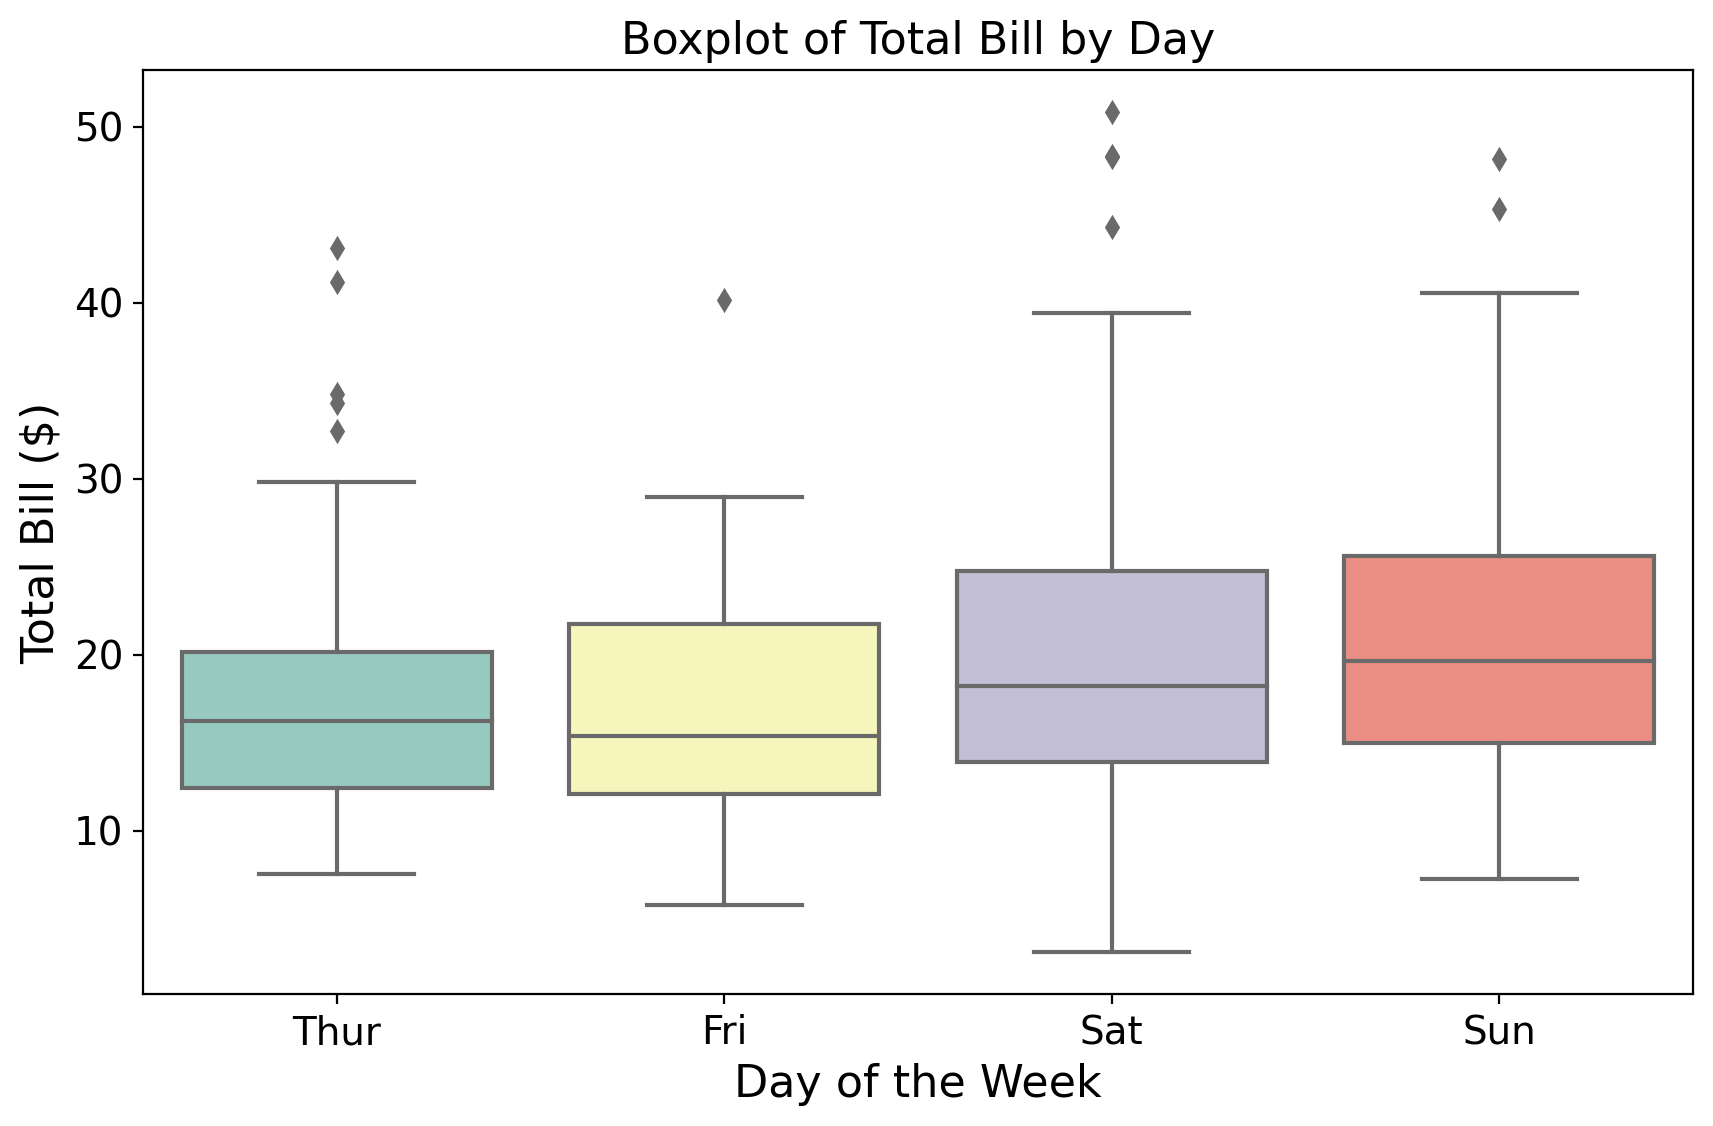

In [39]:
# Load an example dataset
df = sns.load_dataset('tips')

# Example 2: Boxplot with Seaborn
plt.figure(figsize=(10, 6), dpi=200)

# Create a boxplot, which is useful for visualizing the distribution of data
# Apply a pre-defined color palette
sns.boxplot(x='day', y='total_bill', data=df, palette='Set3')

plt.title('Boxplot of Total Bill by Day', fontsize=16)
plt.xlabel('Day of the Week', fontsize=16)
plt.ylabel('Total Bill ($)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## 2.3. Pair Plot

Pair plots visualize relationships between multiple variables by plotting pairwise relationships in a dataset.

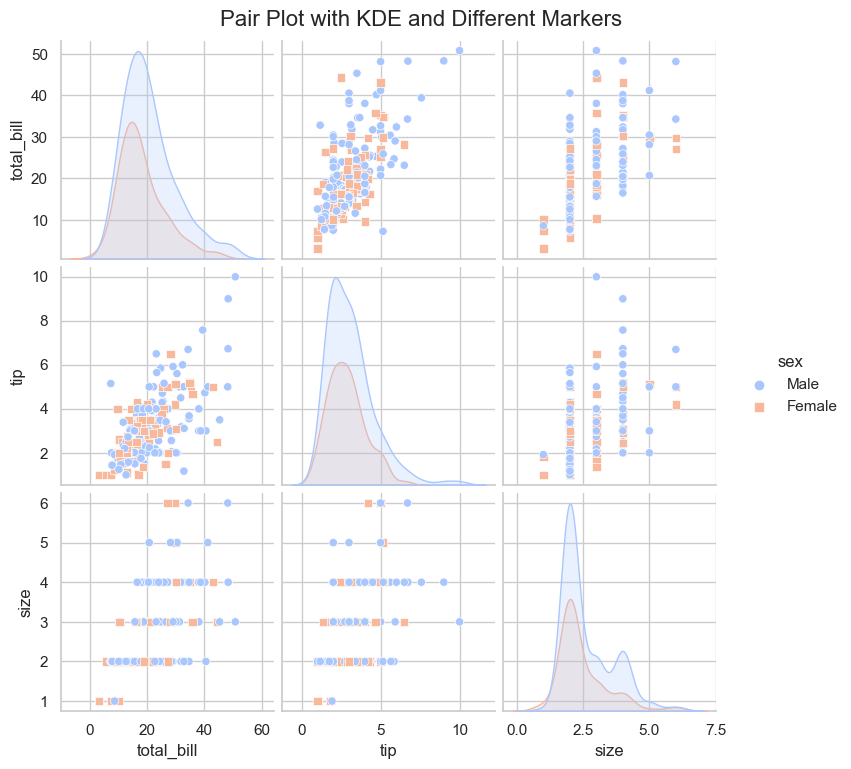

In [93]:
sns.pairplot(df, hue='sex', palette='coolwarm', diag_kind='kde',
             markers=['o', 's'], height=2.5)
plt.suptitle('Pair Plot with KDE and Different Markers', fontsize=16, y=1.02)
plt.show()

## 2.4. Heatmap

Heatmaps are used to visualize data in matrix form, with colors representing values. Adding annotations can help identify specific values directly on the plot.

/var/folders/cw/kxn6b4x54wb843f3mgc7675h0000gn/T/ipykernel_82453/4009015912.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



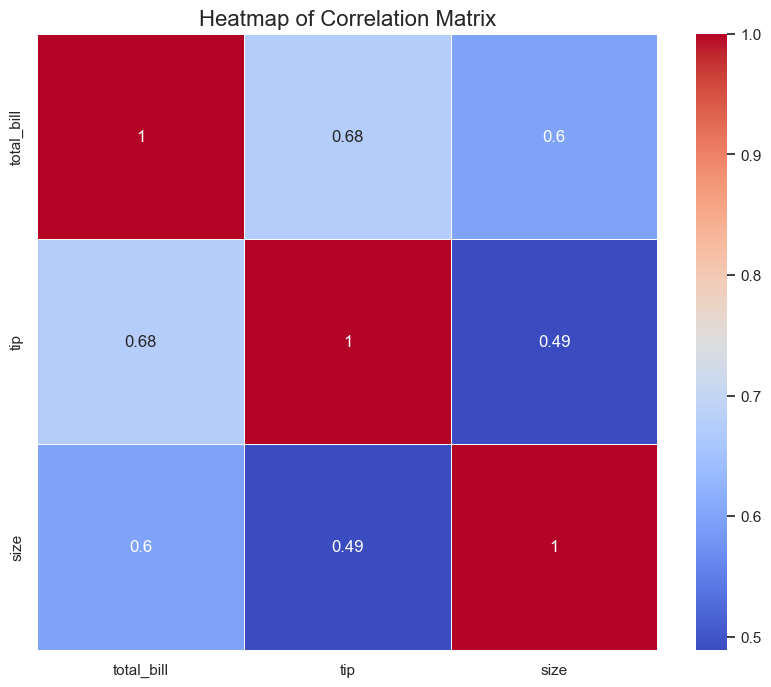

In [81]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.show()

## 2.5. Violin Plot

Violin plots are a combination of box plots and KDE (Kernel Density Estimates), showing both the distribution and the probability density of the data at different values.

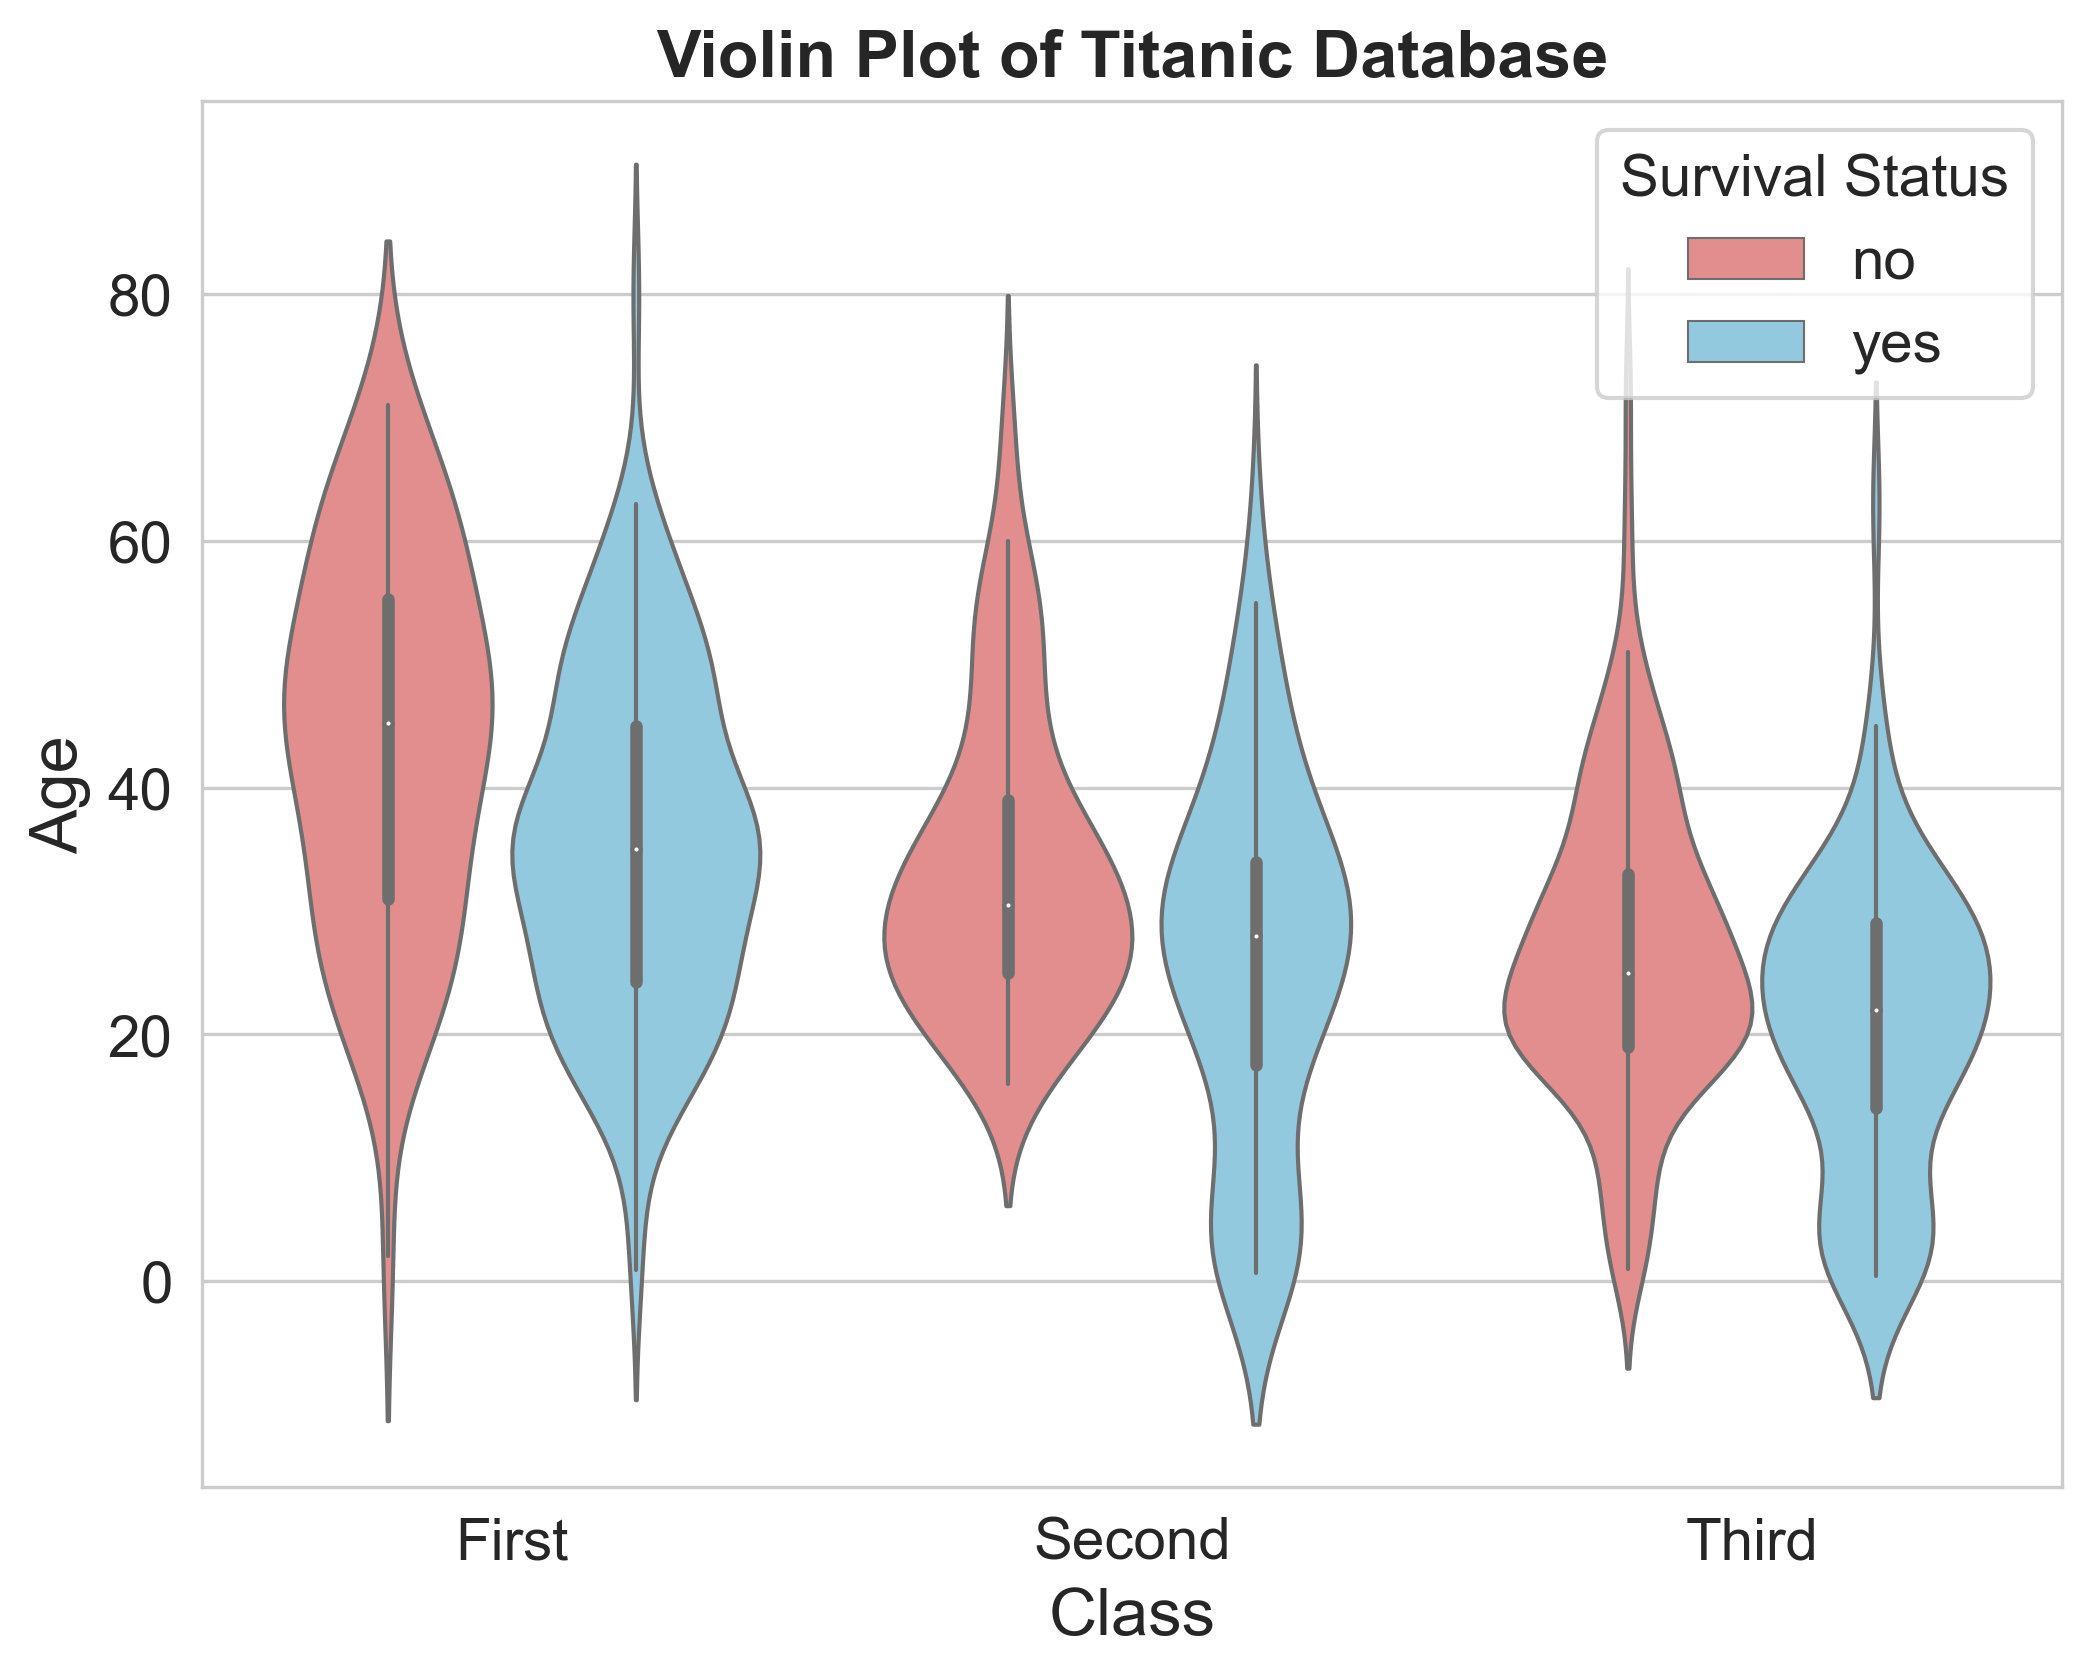

In [98]:
df = sns.load_dataset("titanic")
plt.figure(figsize=(8, 6), dpi=300)
sns.violinplot(data=df, x="class", y="age", hue="alive", linewidth=1, palette={"yes": "skyblue", "no": "lightcoral"})

plt.title('Violin Plot of Titanic Database', fontsize=16, weight="bold")
plt.xlabel('Class', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Survival Status', fontsize=14, title_fontsize=14, loc='upper right')
plt.show()

<Axes: xlabel='class', ylabel='age'>

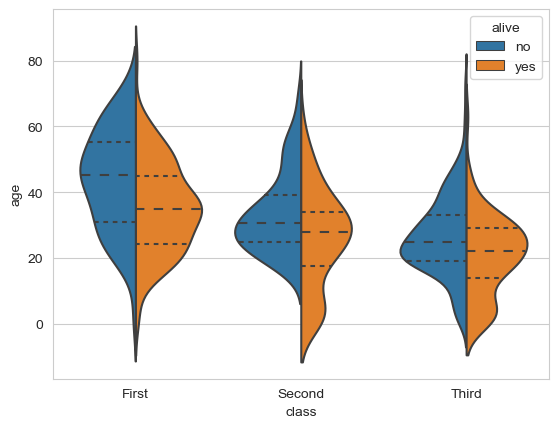

In [60]:
sns.violinplot(data=df, x="class", y="age", hue="alive", split=True, gap=.2, inner="quart")

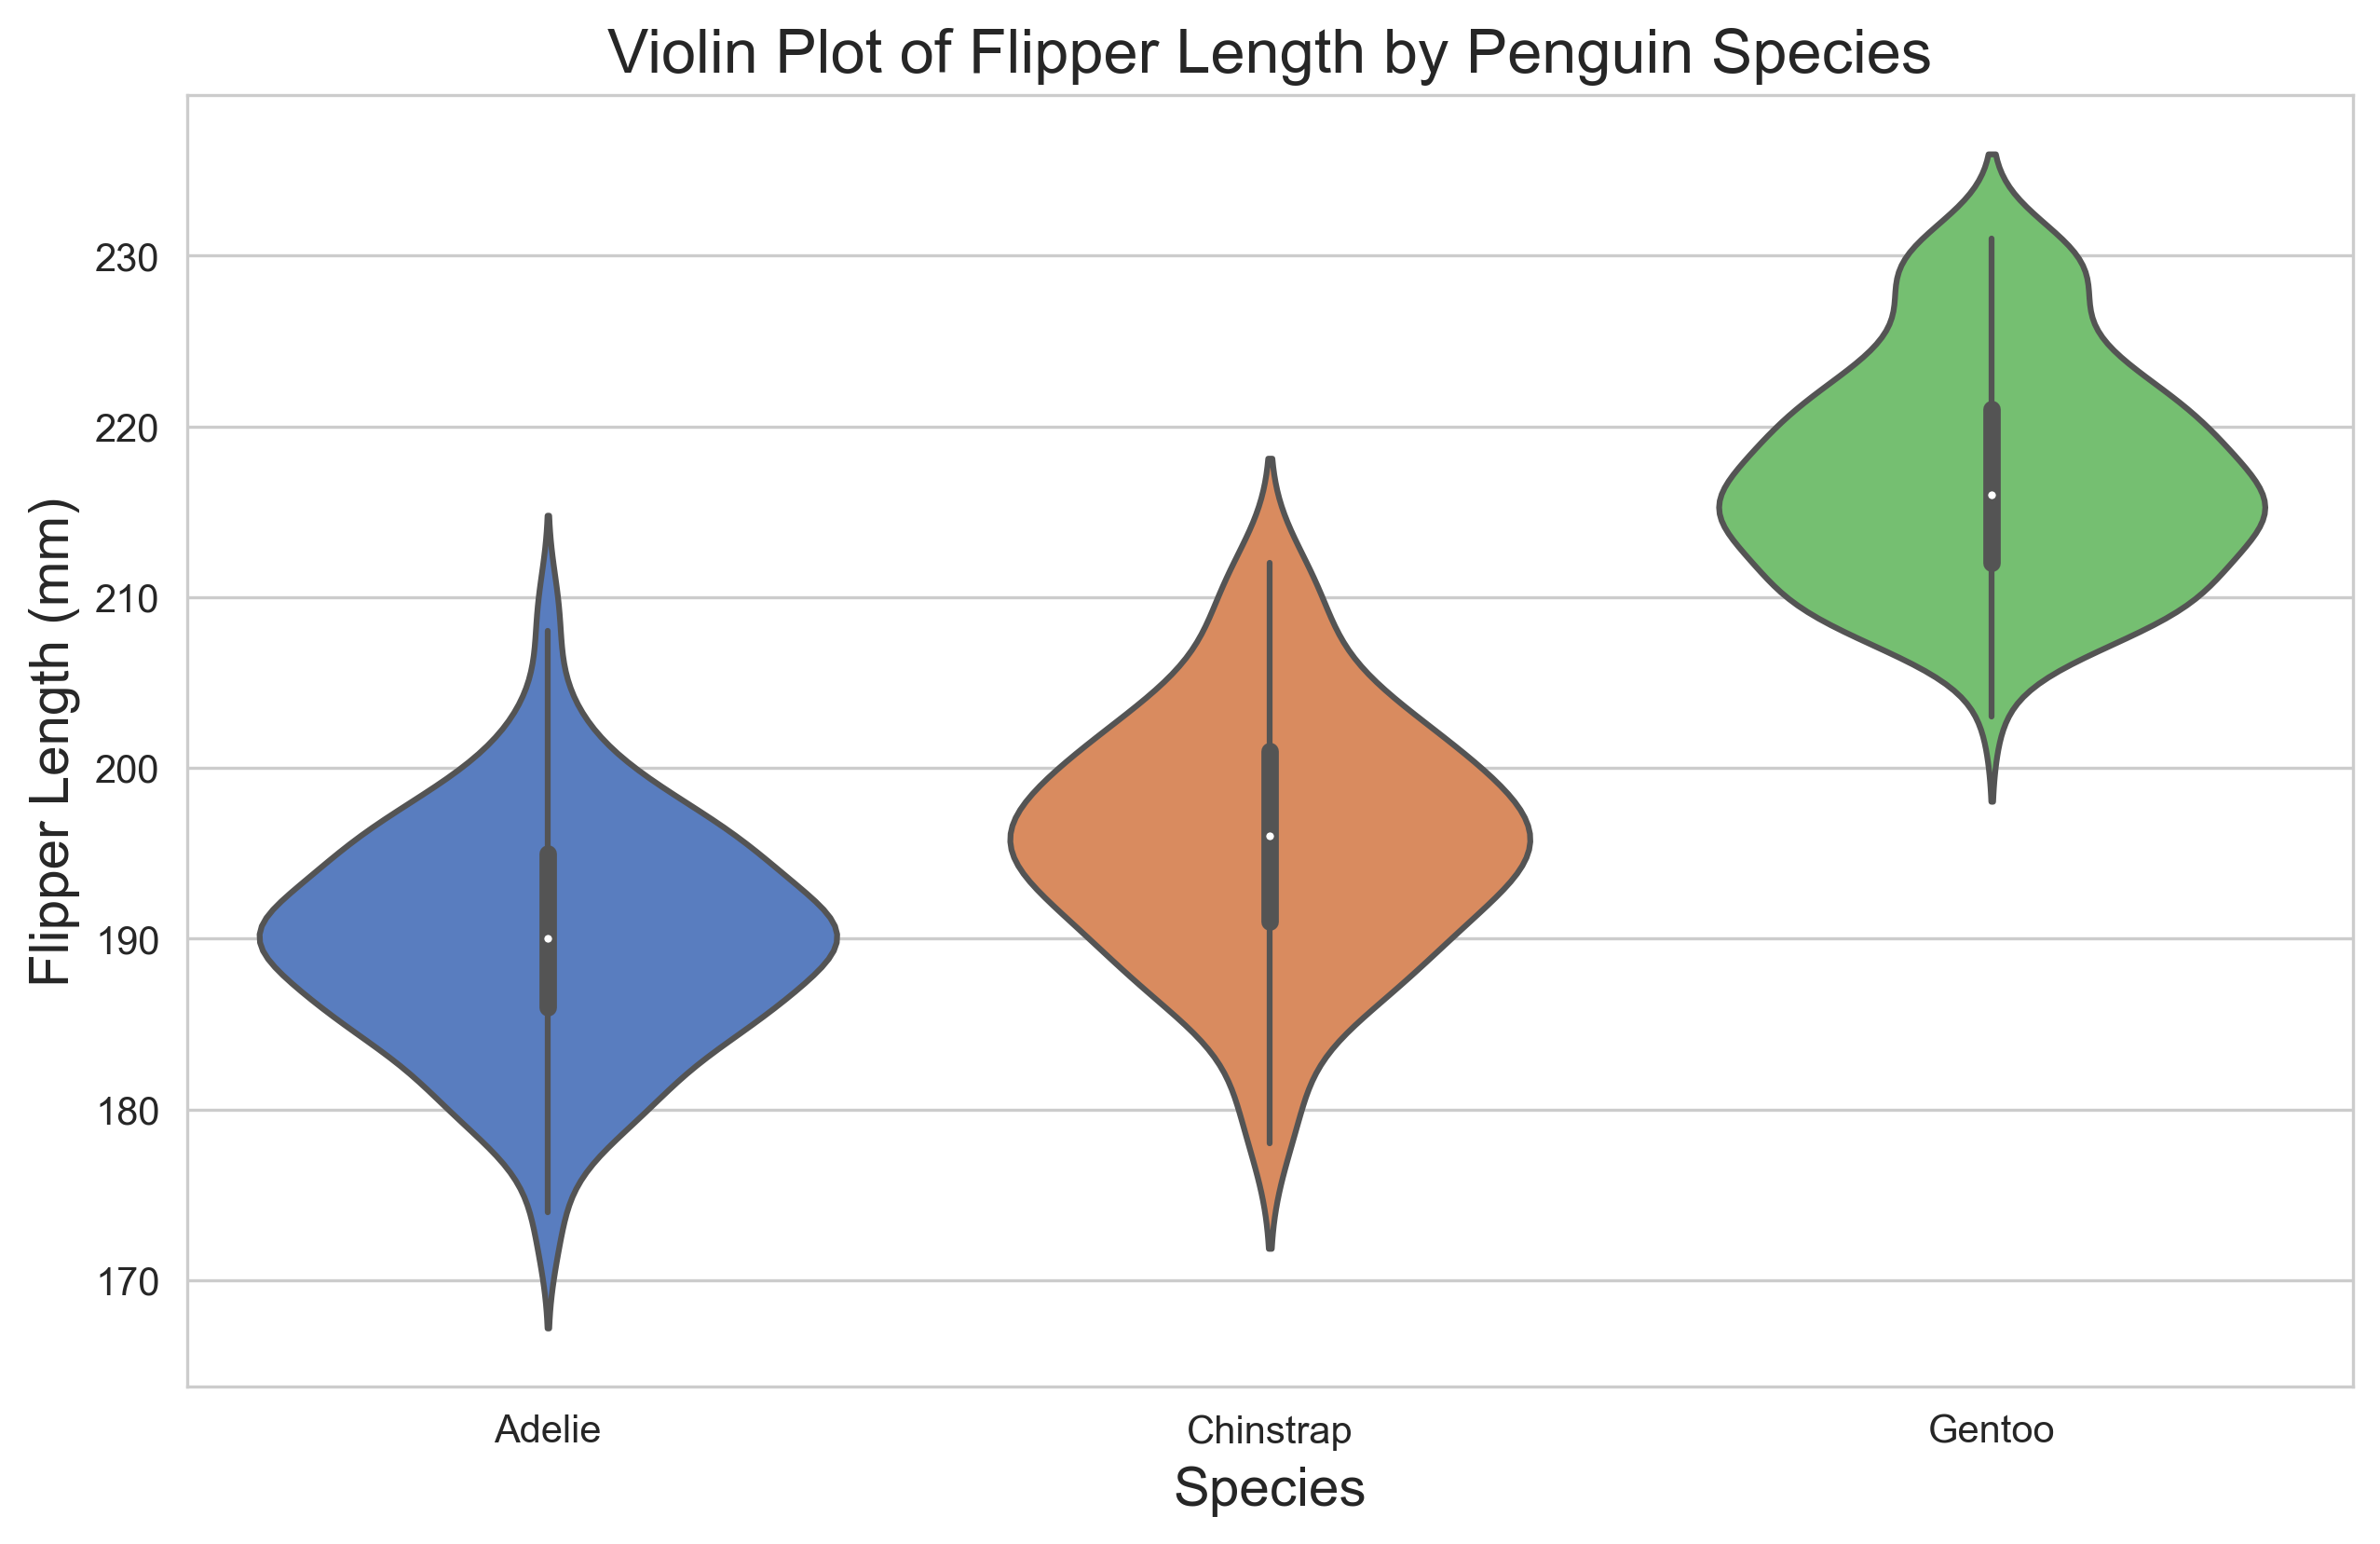

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = sns.load_dataset('penguins')

# Create violin plot
plt.figure(figsize=(10, 6), dpi=300)
sns.violinplot(x='species', y='flipper_length_mm', data=df, palette='muted')
plt.title('Violin Plot of Flipper Length by Penguin Species', fontsize=16)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Flipper Length (mm)', fontsize=14)
plt.show()

## 2.6. Swarm Plot

Swarm plots are similar to strip plots but prevent overlapping points, making them ideal for displaying all observations and understanding their distribution.

/var/folders/cw/kxn6b4x54wb843f3mgc7675h0000gn/T/ipykernel_82453/2224425167.py:2: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



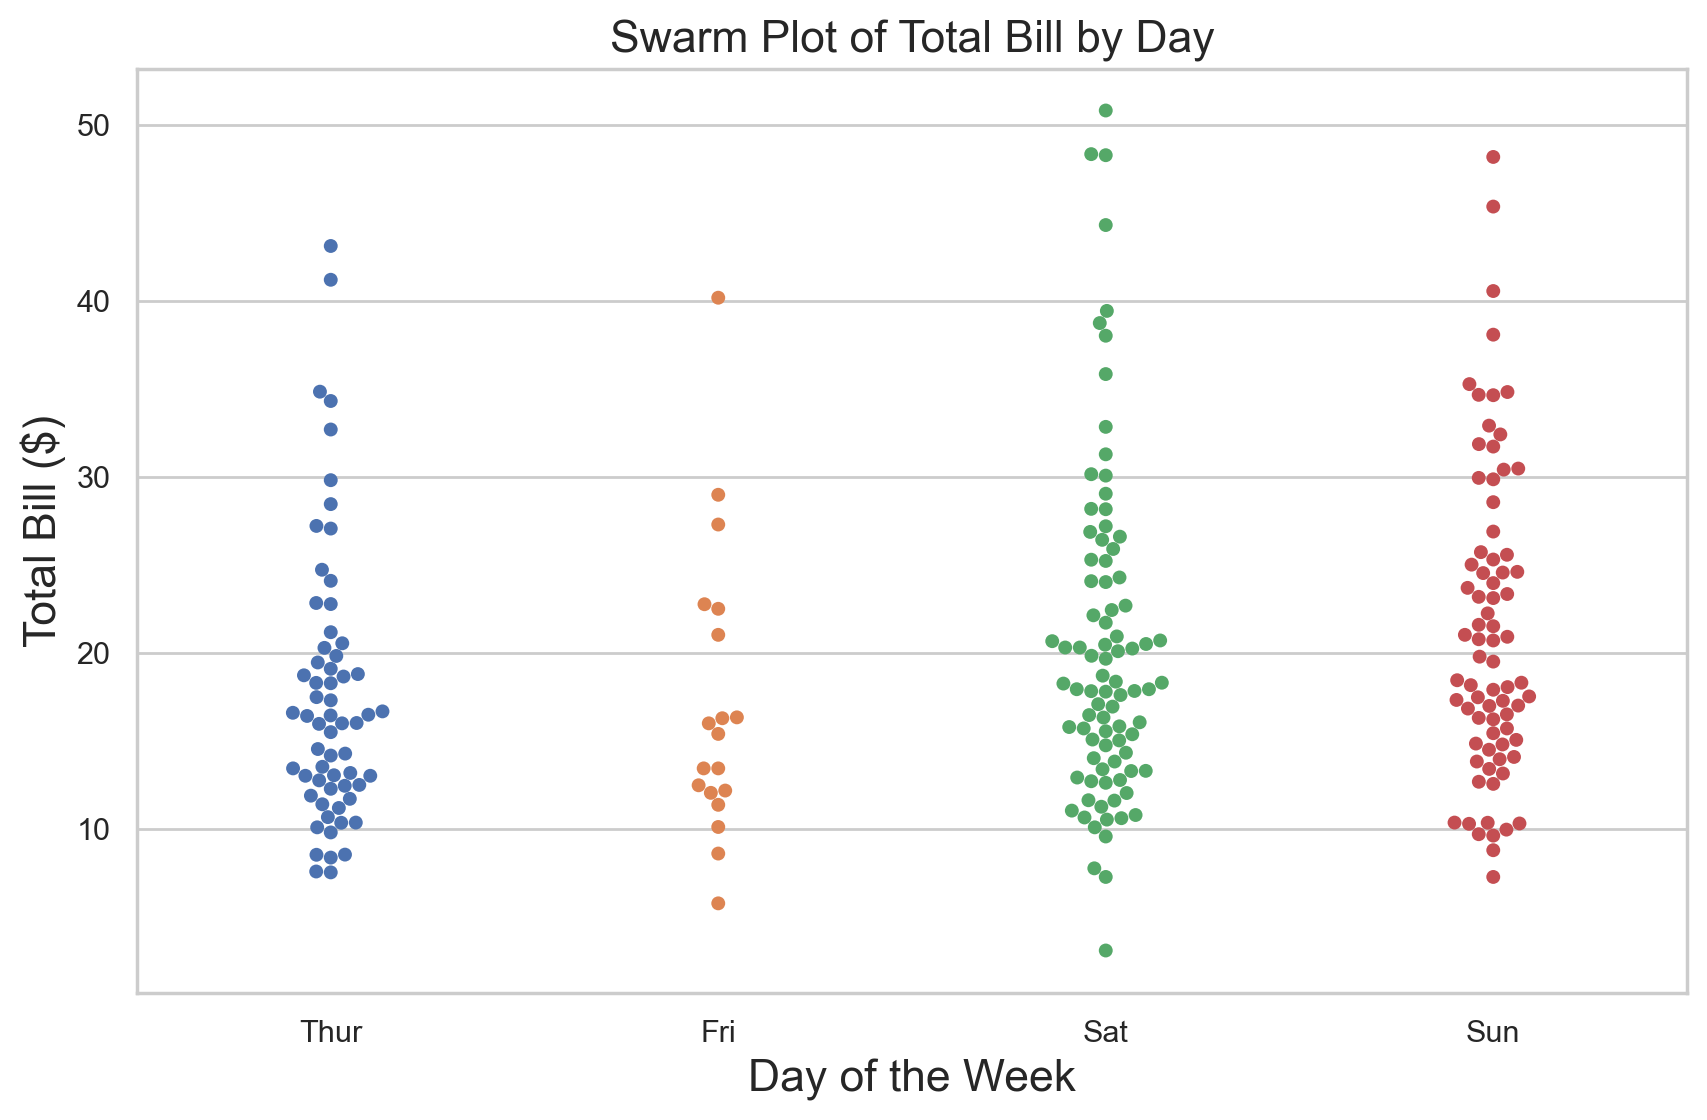

In [96]:
plt.figure(figsize=(10, 6), dpi=200)
sns.swarmplot(x='day', y='total_bill', data=df, palette='deep')
plt.title('Swarm Plot of Total Bill by Day', fontsize=16)
plt.xlabel('Day of the Week', fontsize=16)
plt.ylabel('Total Bill ($)', fontsize=16)
plt.show()

## 2.7. FacetGrid for Multiple Plots

FacetGrid allows you to create multiple plots based on subsets of your data. It’s great for visualizing distributions across multiple categories or dimensions.

<Figure size 2000x1200 with 0 Axes>

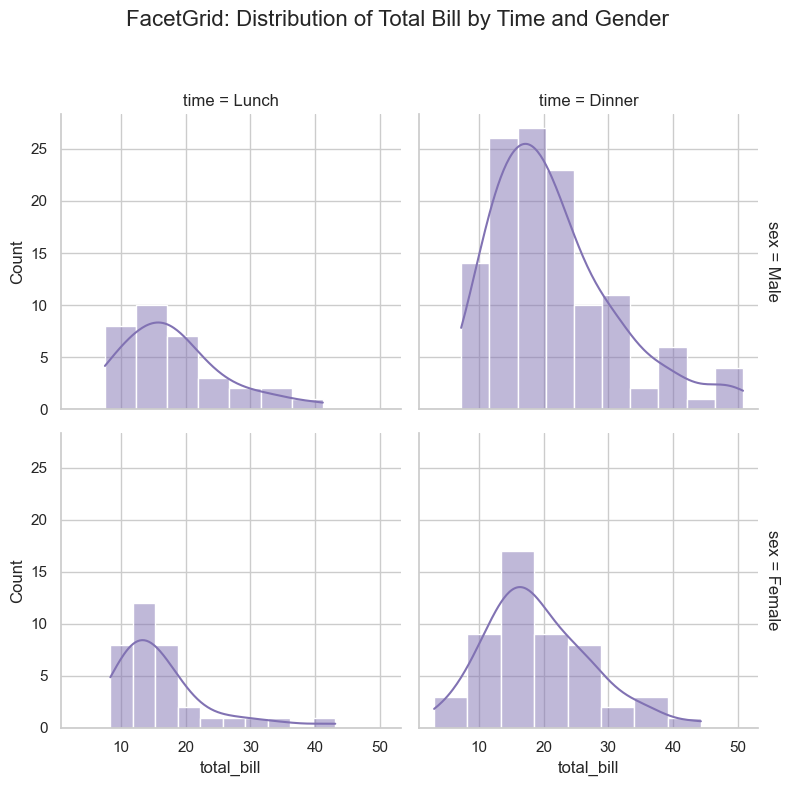

In [99]:
plt.figure(figsize=(10, 6), dpi=200)
g = sns.FacetGrid(df, col="time", row="sex", margin_titles=True, height=4)
g.map(sns.histplot, "total_bill", kde=True, color="m")
g.add_legend()
plt.suptitle('FacetGrid: Distribution of Total Bill by Time and Gender', fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()

## 2.8. Joint Plot with Multiple Visualizations

Joint plots display the relationship between two variables with scatter plots, histograms, and KDE, all in one visualization.

<Figure size 1200x900 with 0 Axes>

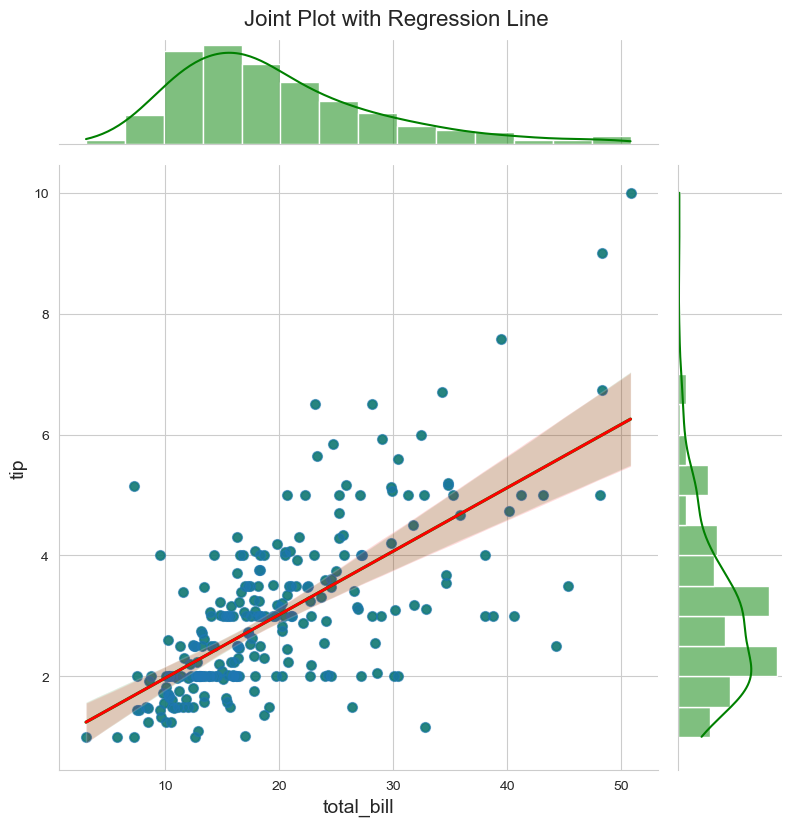

In [46]:
df = sns.load_dataset('tips')

plt.figure(figsize=(4, 3), dpi=300)

sns.set_style("whitegrid") # Set an aesthetic style to the plot

g = sns.jointplot(x='total_bill', y='tip', data=df, kind='reg', height=8, color='g') # Create the joint plot
g.fig.suptitle('Joint Plot with Regression Line', fontsize=16, y=1.02) # Add title with adjusted position and font size

g.set_axis_labels('Total Bill ($)', 'Tip ($)', fontsize=14)

# Customize the appearance of the regression line and scatter plot
g.plot_joint(sns.regplot, scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'red', 'lw': 2}) 

plt.show()

## 3.6. Ridge Plot (Joy Plot)

Ridge plots (also known as joy plots) show the distribution of a continuous variable for different categories, stacked on top of each other. They are useful for comparing distributions across categories.

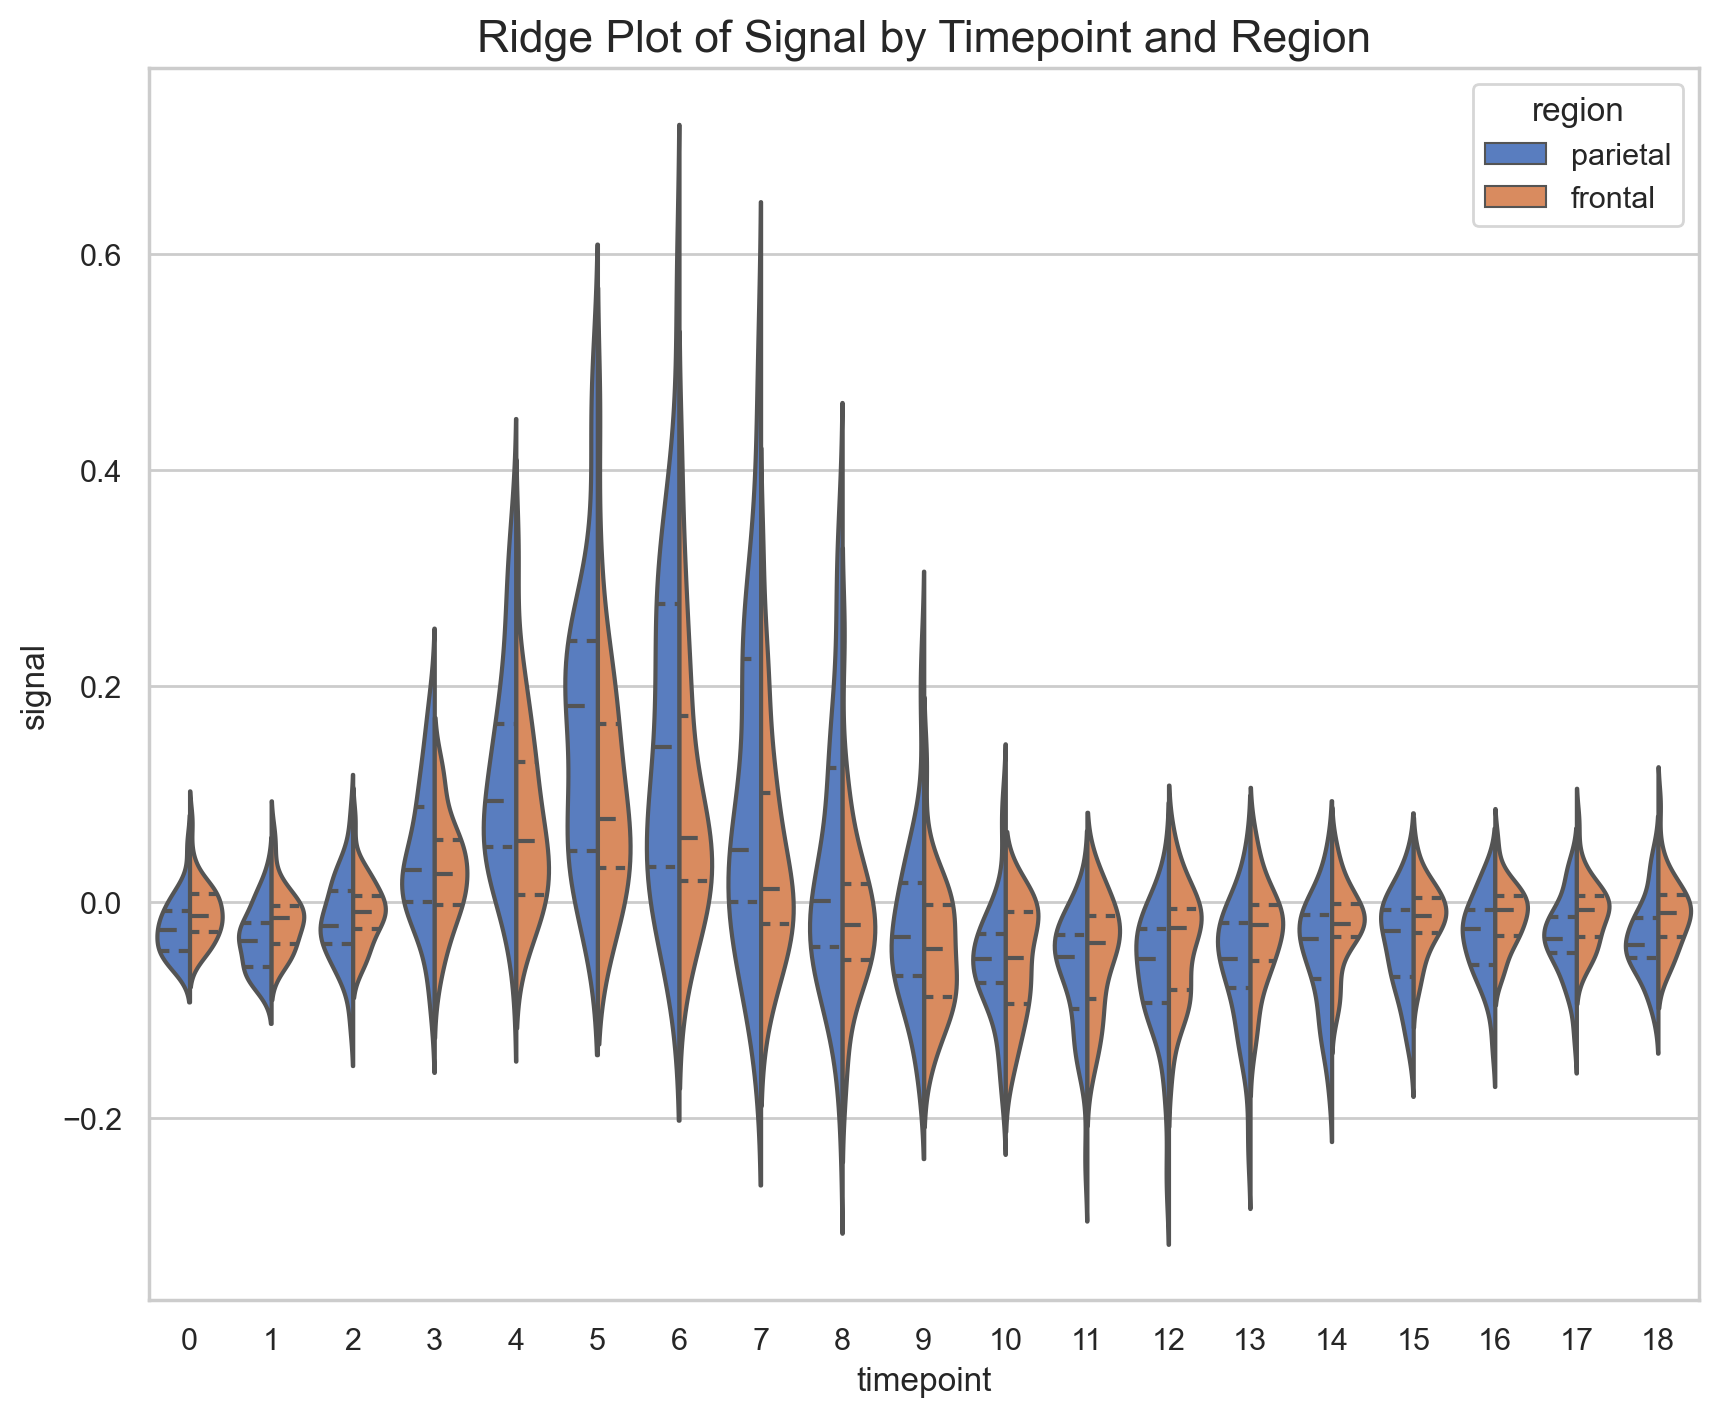

In [111]:
df = sns.load_dataset('fmri')

plt.figure(figsize=(10, 8), dpi=200)
sns.violinplot(x="timepoint", y="signal", hue="region", data=df, split=True, inner="quart",
               palette="muted", scale="width")
plt.title('Ridge Plot of Signal by Timepoint and Region', fontsize=16)
plt.show()

# **3. Interactive Visualization with Plotly**

## 3.1. Interactive Scatter Plot

Interactive scatter plots allow for exploration of data points with interactivity.

In [42]:
import plotly.express as px

# Example 4: Interactive Scatter Plot with Plotly

# Colors points based on the day of the week
# Varies the size of points based on another variable
fig = px.scatter(df, x='total_bill', y='tip', color='day', size='size',
                 title='Interactive Scatter Plot of Tips vs. Total Bill')
fig.show()

## 3.2. Interactive Bar Plot

Interactive bar plots can be used to compare categories with interactivity.

In [85]:
fig = px.bar(df, x='day', y='total_bill', color='sex', barmode='group',
             title='Interactive Bar Plot of Total Bill by Day and Sex')
fig.show()

## 3.3. Interactive Pie Chart

Interactive pie charts display proportions and allow users to explore data by interacting with the chart.

In [84]:
fig = px.pie(df, values='total_bill', names='day', title='Interactive Pie Chart of Total Bill by Day')
fig.show()

## 3.4. Interactive Choropleth Map

Choropleth maps display geographical data with varying colors based on data values. This is useful for visualizing population, sales, or other region-specific data.

In [101]:
import plotly.express as px

# Example Data: Population by State
data = px.data.gapminder().query("year == 2007")

# Choropleth Map
fig = px.choropleth(data, locations="iso_alpha", color="gdpPercap", hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma, title='World GDP Per Capita in 2007')
fig.show()

## 3.5. Treemap

Treemaps visualize hierarchical data using nested rectangles. They are particularly useful for displaying the relative sizes of categories within categories.

In [102]:
fig = px.treemap(df, path=['day', 'sex'], values='total_bill', 
                 color='total_bill', hover_data=['day', 'sex', 'total_bill'],
                 color_continuous_scale='Viridis', title='Treemap of Total Bill by Day and Gender')
fig.show()

# 4. Combining Multiple Visualizations

## 4.1. Subplots in Matplotlib

You can combine multiple plots in a single figure using subplots.

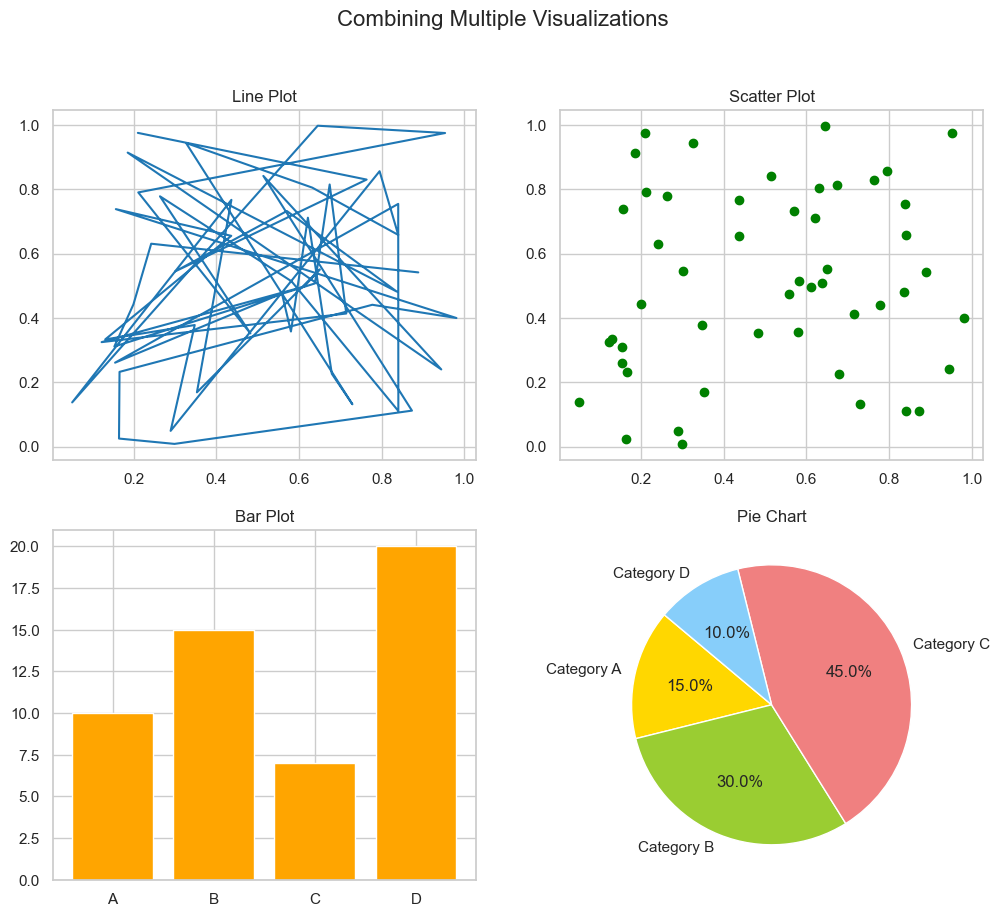

In [86]:
# Subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Line Plot
axs[0, 0].plot(x, y, 'tab:blue')
axs[0, 0].set_title('Line Plot')

# Scatter Plot
axs[0, 1].scatter(x, y, color='green')
axs[0, 1].set_title('Scatter Plot')

# Bar Plot
axs[1, 0].bar(categories, values, color='orange')
axs[1, 0].set_title('Bar Plot')

# Pie Chart
axs[1, 1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axs[1, 1].set_title('Pie Chart')

plt.suptitle('Combining Multiple Visualizations', fontsize=16)
plt.show()


## 4.2. Dashboards with Plotly

Plotly allows for the creation of interactive dashboards by combining multiple plots.

In [88]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create subplots: specify subplot types (default is 'xy')
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "xy"}, {"type": "xy"}],
           [{"type": "xy"}, {"type": "domain"}]],  # 'domain' is for pie charts
    subplot_titles=('Scatter Plot', 'Bar Plot', 'Line Plot', 'Pie Chart')
)

# Scatter Plot
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6], mode='markers', name='Scatter'),
              row=1, col=1)

# Bar Plot
fig.add_trace(go.Bar(x=['A', 'B', 'C'], y=[10, 20, 30], name='Bar'),
              row=1, col=2)

# Line Plot
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[10, 15, 13], mode='lines', name='Line'),
              row=2, col=1)

# Pie Chart
fig.add_trace(go.Pie(labels=['Category A', 'Category B', 'Category C'], 
                     values=[50, 30, 20], name='Pie'), 
              row=2, col=2)

# Update layout
fig.update_layout(height=700, width=900, title_text="Subplots with Different Plot Types")

# Show the plot
fig.show()



## Further Reading and Resources

• Matplotlib Documentation: https://matplotlib.org/stable/contents.html

• Seaborn Documentation: https://seaborn.pydata.org/

• Plotly Documentation: https://plotly.com/python/

• Data Visualization Best Practices: https://www.data-to-viz.com/